In [1]:
#Web scraping: the use of a program or algorithm to extract and process large amounts of data from the web.
import pandas as pd
pd.read_html("https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")
#Read HTML tables into a "list" of "DataFrame" objects
#in below we can see the list of all tables and data frames

[                                                   0  \
 0  Historical logarithmic graph of the DJIA from ...   
 1                                         Foundation   
 2                                           Operator   
 3                                          Exchanges   
 4                                     Trading symbol   
 5                                       Constituents   
 6                                               Type   
 7                                         Market cap   
 8                                   Weighting method   
 9                                            Website   
 
                                                    1  
 0  Historical logarithmic graph of the DJIA from ...  
 1  February 16, 1885; 137 years ago[1]May 26, 189...  
 2                              S&P Dow Jones Indices  
 3                      New York Stock ExchangeNASDAQ  
 4                                  ^DJI$INDU.DJIDJIA  
 5                                 

In [2]:
const = pd.read_html("https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")[1]
const  #const : constituents
#we can drop columns that we don't need like notes,... 
#we just choose first 5 columns
const = const.iloc[:, :5].copy()
const

,Company,Exchange,Symbol,Industry,Date added
0,3M,NYSE,MMM,Conglomerate,1976-08-09
1,American Express,NYSE,AXP,Financial services,1982-08-30
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12
5,Caterpillar,NYSE,CAT,Construction and Mining,1991-05-06
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19
7,Cisco,NASDAQ,CSCO,Information technology,2009-06-08
8,Coca-Cola,NYSE,KO,Drink industry,1987-03-12
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06


In [3]:
const.rename(columns = {"Date added":"Date_Added"}, inplace=True)
#first we should use a usable name with underscore
const.Date_Added = pd.to_datetime(const.Date_Added)
#then changing the name of Date_Added to datetime
const.info()
#we have no missing values, we have company, exchange, symbol, industry & 
#(datetime in the column date_added

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Company     30 non-null     object        
 1   Exchange    30 non-null     object        
 2   Symbol      30 non-null     object        
 3   Industry    30 non-null     object        
 4   Date_Added  30 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 1.3+ KB


### Normalizing Unicode Strings and Getting the Ticker Symbols

In [4]:
const
#now we want to extract symbols from symbol column

,Company,Exchange,Symbol,Industry,Date_Added
0,3M,NYSE,MMM,Conglomerate,1976-08-09
1,American Express,NYSE,AXP,Financial services,1982-08-30
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12
5,Caterpillar,NYSE,CAT,Construction and Mining,1991-05-06
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19
7,Cisco,NASDAQ,CSCO,Information technology,2009-06-08
8,Coca-Cola,NYSE,KO,Drink industry,1987-03-12
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06


In [5]:
const.Symbol

0      MMM
1      AXP
2     AMGN
3     AAPL
4       BA
5      CAT
6      CVX
7     CSCO
8       KO
9      DIS
10     DOW
11      GS
12      HD
13     HON
14     IBM
15    INTC
16     JNJ
17     JPM
18     MCD
19     MRK
20    MSFT
21     NKE
22      PG
23     CRM
24     TRV
25     UNH
26      VZ
27       V
28     WBA
29     WMT
Name: Symbol, dtype: object

In [6]:
const.Symbol[0]

'MMM'

In [7]:
const.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Company     30 non-null     object        
 1   Exchange    30 non-null     object        
 2   Symbol      30 non-null     object        
 3   Industry    30 non-null     object        
 4   Date_Added  30 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 1.3+ KB


In [8]:
import unicodedata

In [9]:
const.Symbol.apply(lambda x: unicodedata.normalize("NFKD", x))[0]
# return the normal form 'form' for the unicode string unistr

'MMM'

In [10]:
const.Symbol[1]

'AXP'

In [11]:
const.Symbol.str.split(": ").apply(lambda x: x[-1])

0      MMM
1      AXP
2     AMGN
3     AAPL
4       BA
5      CAT
6      CVX
7     CSCO
8       KO
9      DIS
10     DOW
11      GS
12      HD
13     HON
14     IBM
15    INTC
16     JNJ
17     JPM
18     MCD
19     MRK
20    MSFT
21     NKE
22      PG
23     CRM
24     TRV
25     UNH
26      VZ
27       V
28     WBA
29     WMT
Name: Symbol, dtype: object

In [12]:
const["Ticker"] = const.Symbol.str.split(": ").apply(lambda x: x[-1])

In [13]:
const

,Company,Exchange,Symbol,Industry,Date_Added,Ticker
0,3M,NYSE,MMM,Conglomerate,1976-08-09,MMM
1,American Express,NYSE,AXP,Financial services,1982-08-30,AXP
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,AMGN
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,AAPL
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,BA
5,Caterpillar,NYSE,CAT,Construction and Mining,1991-05-06,CAT
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,CVX
7,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,CSCO
8,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,KO
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06,DIS


In [14]:
ticker_list = const.Ticker.to_list()

In [15]:
ticker_list

['MMM',
 'AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'CRM',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WBA',
 'WMT']

In [16]:
const.to_csv("const.csv", index = False)

In [17]:
import pandas as pd
import yfinance as yf

In [18]:
yf.download("^DJI")  #dowjones industrial ticker index
#we get the full history from fist date data was available: 1992
#open price, close price, trading volume, ...

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1992-01-02,3152.100098,3172.629883,3139.310059,3172.399902,3172.399902,23550000
1992-01-03,3172.399902,3210.639893,3165.919922,3201.500000,3201.500000,23620000
1992-01-06,3201.500000,3213.330078,3191.860107,3200.100098,3200.100098,27280000
1992-01-07,3200.100098,3210.199951,3184.479980,3204.800049,3204.800049,25510000
1992-01-08,3204.800049,3229.199951,3185.820068,3203.899902,3203.899902,29040000
...,...,...,...,...,...,...
2022-09-20,30888.529297,30888.529297,30465.910156,30706.230469,30706.230469,317970000
2022-09-21,30819.390625,31020.789062,30181.990234,30183.779297,30183.779297,354960000
2022-09-22,30204.519531,30302.279297,29994.529297,30076.679688,30076.679688,335270000


In [19]:
dji = yf.download("^DJI", start = "2010-01-01", end = "2022-09-01")

[*********************100%***********************]  1 of 1 completed


In [20]:
dji

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000
2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000
2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,10573.679688,186040000
2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,10606.860352,217390000
2010-01-08,10606.400391,10619.400391,10554.330078,10618.190430,10618.190430,172710000
...,...,...,...,...,...,...
2022-08-25,33029.269531,33306.089844,32889.851562,33291.781250,33291.781250,308530000
2022-08-26,33293.429688,33364.699219,32278.220703,32283.400391,32283.400391,352850000
2022-08-29,32188.000000,32325.160156,31972.789062,32098.990234,32098.990234,317820000


In [21]:
dji.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3188 entries, 2010-01-04 to 2022-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3188 non-null   float64
 1   High       3188 non-null   float64
 2   Low        3188 non-null   float64
 3   Close      3188 non-null   float64
 4   Adj Close  3188 non-null   float64
 5   Volume     3188 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 174.3 KB


In [22]:
dji.to_csv("dji.csv")

In [23]:
ticker_list

['MMM',
 'AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'CRM',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WBA',
 'WMT']

In [24]:
prices = yf.download(ticker_list, start = "2010-01-01", end = "2022-09-01")

[*********************100%***********************]  30 of 30 completed


In [25]:
prices

Adj Close                                                  \
                  AAPL        AMGN         AXP          BA         CAT   
Date                                                                     
2010-01-04    6.526021   43.565189   33.921696   43.777546   41.629898   
2010-01-05    6.537302   43.187809   33.847080   45.211349   42.127605   
2010-01-06    6.433318   42.863262   34.394203   46.582806   42.255589   
2010-01-07    6.421425   42.470798   34.952053   48.468559   42.426228   
2010-01-08    6.464118   42.848164   34.927067   48.001026   42.902596   
...                ...         ...         ...         ...         ...   
2022-08-25  170.029999  245.679993  162.229996  169.380005  198.880005   
2022-08-26  163.619995  240.649994  157.309998  164.529999  191.919998   
2022-08-29  161.380005  239.380005  154.539993  165.419998  191.779999   
2022-08-30  158.910004  239.119995  154.660004  162.210007  186.940002   
2022-08-31  157.220001  240.300003  152.000000  160.250000  184.710007   

                                                                      ...  \
                   CRM       CSCO         CVX         DIS        DOW  ...   
Date                                                                  ...   
2010-01-04   18.705000  17.695969   47.631680   27.933922        NaN  ...   
2010-01-05   18.625000  17.617125   47.969082   27.864237        NaN  ...   
2010-01-06   18.592501  17.502449   47.975105   27.716164        NaN  ...   
2010-01-07   18.510000  17.581291   47.794346   27.724878        NaN  ...   
2010-01-08   18.537500  17.674465   47.878693   27.768423        NaN  ...   
...                ...        ...         ...         ...        ...  ...   
2022-08-25  173.910004  47.270000  164.619995  117.459999  55.031384  ...   
2022-08-26  165.229996  45.889999  163.410004  114.070000  53.748371  ...   
2022-08-29  160.210007  45.709999  164.630005  113.529999  52.869999  ...   
2022-08-30  159.669998  45.240002  160.619995  112.430000  51.380001  ...   
2022-08-31  156.119995  44.720001  158.059998  112.080002  51.000000  ...   

              Volume                                                   \
                 MRK      MSFT       NKE       PG       TRV       UNH   
Date                                                                    
2010-01-04  14563532  38409100  11972400  9190800   3716000  12199500   
2010-01-05  15452550  49749600   6275200  8649400   5941900  11180700   
2010-01-06  15971415  58182400  13399200  9908400  10124500   9761100   
2010-01-07  12488597  50559700   7187600  8972800   4901600  11789800   
2010-01-08  11283921  51197400   7249600  8464600   3933100   7228700   
...              ...       ...       ...      ...       ...       ...   
2022-08-25   5884300  16583400   5433700  5097600   1231300   1965800   
2022-08-26   5695300  27549300   6203600  6086600   1161500   1906700   
2022-08-29   7850200  20338500   4132400  5272100    819600   1594000   
2022-08-30   6754000  22767100   5129500  5203700    953900   2013400   
2022-08-31  11602000  24791800   8884800  8406900   1514300   2891300   

                                                    
                   V        VZ       WBA       WMT  
Date                                                
2010-01-04  20180000  16176648   8171000  20753100  
2010-01-05  25833600  23722957  10843200  15648400  
2010-01-06  16254000  37506464   8945400  12517200  
2010-01-07  27841200  25508242   5040700  10662700  
2010-01-08  11907200  20658308   6139800  11363200  
...              ...       ...       ...       ...  
2022-08-25   4495000  14327600   6433300   6471500  
2022-08-26   5060200  16795700   6927600   7110600  
2022-08-29   4476200  15039500   5316400   5793900  
2022-08-30   3918200  20705100   6668800   4822700  
2022-08-31   6559000  28368200   7828500   7486900  

[3188 rows x 180 columns]

In [26]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3188 entries, 2010-01-04 to 2022-08-31
Columns: 180 entries, ('Adj Close', 'AAPL') to ('Volume', 'WMT')
dtypes: float64(151), int64(29)
memory usage: 4.4 MB


In [27]:
prices = prices.loc[:,"Close"].copy()
#its sufficient to have daily close prices at the end of the day

In [28]:
prices

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.643214,57.720001,40.919998,56.180000,58.549999,18.705000,24.690001,79.059998,32.070000,NaN,...,35.314884,30.950001,16.337500,61.119999,49.810001,31.530001,22.035000,31.212946,37.299999,54.230000
2010-01-05,7.656429,57.220001,40.830002,58.020000,59.250000,18.625000,24.580000,79.620003,31.990000,NaN,...,35.458015,30.959999,16.402500,61.139999,48.630001,31.480000,21.782499,31.269218,37.000000,53.689999
2010-01-06,7.534643,56.790001,41.490002,59.779999,59.430000,18.592501,24.420000,79.629997,31.820000,NaN,...,35.935116,30.770000,16.302500,60.849998,47.939999,31.790001,21.490000,29.937416,36.720001,53.570000
2010-01-07,7.520714,56.270000,41.980000,62.200001,59.669998,18.510000,24.530001,79.330002,31.830000,NaN,...,35.992367,30.450001,16.462500,60.520000,48.630001,33.009998,21.690001,29.759218,36.939999,53.599998
2010-01-08,7.570714,56.770000,41.950001,61.599998,60.340000,18.537500,24.660000,79.470001,31.879999,NaN,...,35.973282,30.660000,16.430000,60.439999,48.560001,32.700001,21.750000,29.777975,36.990002,53.330002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,170.029999,245.679993,162.229996,169.380005,198.880005,173.910004,47.270000,164.619995,117.459999,55.759998,...,90.269997,278.850006,113.220001,145.699997,168.979996,541.570007,209.820007,43.740002,36.799999,135.869995
2022-08-26,163.619995,240.649994,157.309998,164.529999,191.919998,165.229996,45.889999,163.410004,114.070000,54.459999,...,89.260002,268.089996,108.279999,142.289993,166.839996,529.250000,202.889999,43.250000,36.000000,131.600006
2022-08-29,161.380005,239.380005,154.539993,165.419998,191.779999,160.210007,45.709999,164.630005,113.529999,53.570000,...,87.589996,265.230011,107.879997,141.690002,165.360001,529.770020,202.330002,43.330002,35.959999,132.880005


In [29]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3188 entries, 2010-01-04 to 2022-08-31
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3188 non-null   float64
 1   AMGN    3188 non-null   float64
 2   AXP     3188 non-null   float64
 3   BA      3188 non-null   float64
 4   CAT     3188 non-null   float64
 5   CRM     3188 non-null   float64
 6   CSCO    3188 non-null   float64
 7   CVX     3188 non-null   float64
 8   DIS     3188 non-null   float64
 9   DOW     871 non-null    float64
 10  GS      3188 non-null   float64
 11  HD      3188 non-null   float64
 12  HON     3188 non-null   float64
 13  IBM     3188 non-null   float64
 14  INTC    3188 non-null   float64
 15  JNJ     3188 non-null   float64
 16  JPM     3188 non-null   float64
 17  KO      3188 non-null   float64
 18  MCD     3188 non-null   float64
 19  MMM     3188 non-null   float64
 20  MRK     3188 non-null   float64
 21  MSFT    3188 non-nu

In [30]:
prices.to_csv("const_prices.csv")

In [31]:
import pandas as pd

In [32]:
pd.read_csv("dji.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3188 entries, 0 to 3187
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3188 non-null   object 
 1   Open       3188 non-null   float64
 2   High       3188 non-null   float64
 3   Low        3188 non-null   float64
 4   Close      3188 non-null   float64
 5   Adj Close  3188 non-null   float64
 6   Volume     3188 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 174.5+ KB


In [33]:
data = pd.read_csv("dji.csv", parse_dates = ["Date"], index_col = "Date")
#we still have Data type column as Object
#by default pandas is not able to convert text data (date time info) to data type date time
#data parsing: converting data from one format to another

In [34]:
data=pd.read_csv("dji.csv", parse_dates = ["Date"], index_col="Date")

In [35]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000
2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000
2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,10573.679688,186040000
2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,10606.860352,217390000
2010-01-08,10606.400391,10619.400391,10554.330078,10618.190430,10618.190430,172710000
...,...,...,...,...,...,...
2022-08-25,33029.269531,33306.089844,32889.851562,33291.781250,33291.781250,308530000
2022-08-26,33293.429688,33364.699219,32278.220703,32283.400391,32283.400391,352850000
2022-08-29,32188.000000,32325.160156,31972.789062,32098.990234,32098.990234,317820000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3188 entries, 2010-01-04 to 2022-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3188 non-null   float64
 1   High       3188 non-null   float64
 2   Low        3188 non-null   float64
 3   Close      3188 non-null   float64
 4   Adj Close  3188 non-null   float64
 5   Volume     3188 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 174.3 KB


In [37]:
df=data.loc["2010-01-01": "2022-09-01", "Close"].to_frame()
# loc is used to index a portion of the dataframe
#we included bull market of 2010 and bear market of 2019

In [38]:
df  #data frame

,Close
Date,
2010-01-04,10583.959961
2010-01-05,10572.019531
2010-01-06,10573.679688
2010-01-07,10606.860352
2010-01-08,10618.190430
...,...
2022-08-25,33291.781250
2022-08-26,32283.400391
2022-08-29,32098.990234


In [39]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn")  #we use seaborn style

In [40]:
df.describe()  #to get some statistics

,Close
count,3188.000000
mean,20467.546808
std,7399.670491
min,9686.480469
25%,14285.622559
50%,18038.819336
75%,25987.515137
max,36799.648438


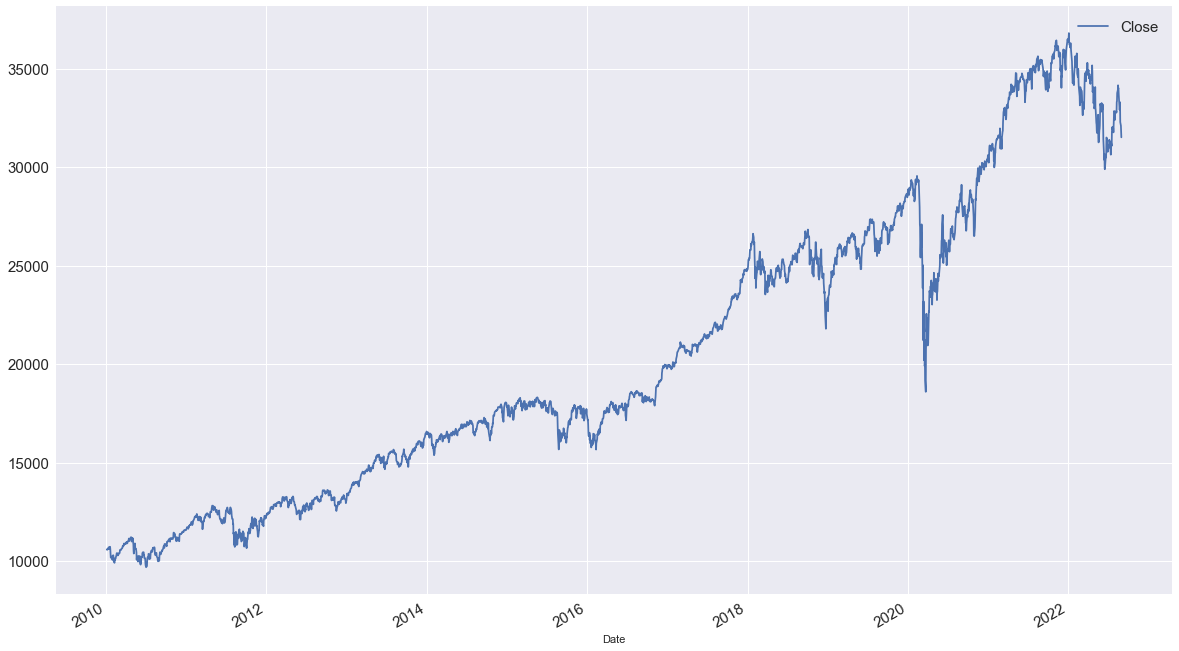

In [41]:
df.plot(figsize = (20,12), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()
#after financial crisis there was a long run of bull market(2010-2020)
#march 2020 financial crisis for covid 19
#next is to calculate daily returns
#in finance is better to work with return instead of absolute prices
#retuen is percentage(relative) changes of prices
#we use percetage change method

In [42]:
df["Return"] = df.pct_change()

In [43]:
df

,Close,Return
Date,,
2010-01-04,10583.959961,NaN
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
...,...,...
2022-08-25,33291.781250,0.009783
2022-08-26,32283.400391,-0.030289
2022-08-29,32098.990234,-0.005712


In [44]:
#we drop rows with at least one missing value 
df.dropna(inplace = True)

In [45]:
df

,Close,Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2022-08-25,33291.781250,0.009783
2022-08-26,32283.400391,-0.030289
2022-08-29,32098.990234,-0.005712


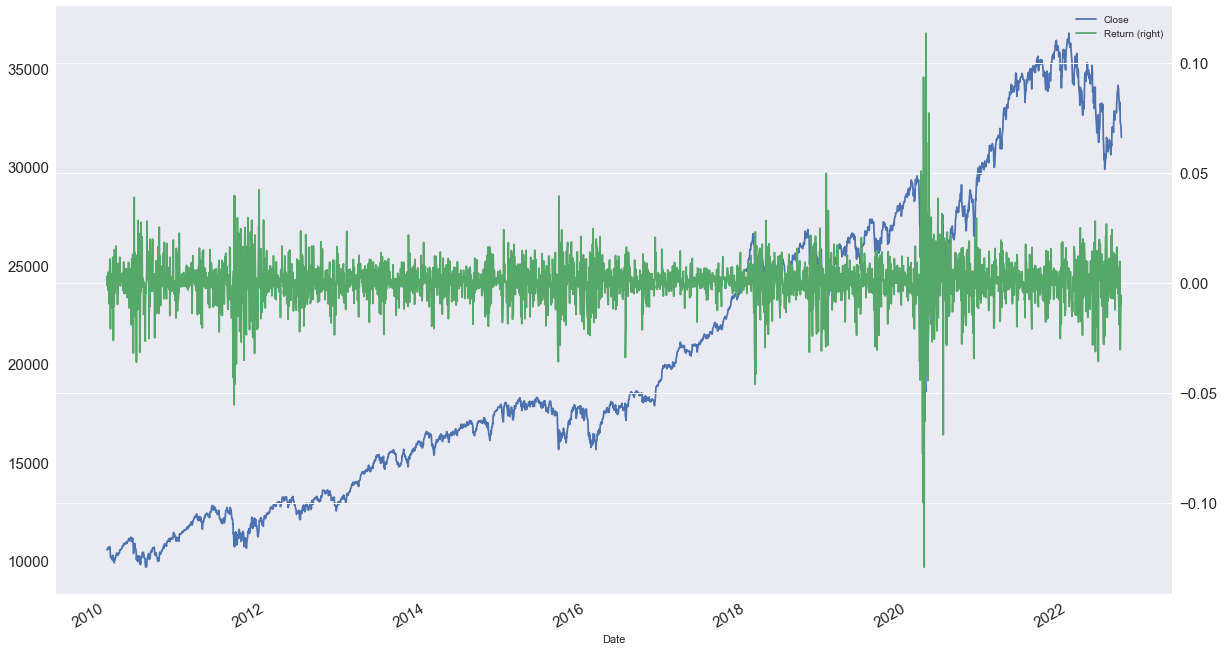

In [46]:
df.plot(figsize= (20,12), secondary_y = "Return", mark_right = True, fontsize= 15)
plt.show()
#we want to see prices and returns in one figure (scales are very different)
#price around 10,000 and return around zero
#we have to creat secondary y axis for returns on the right hand side of figure
#primary y axis for prices on the left hand side of figure
#green is the return which is close to zero
#we have huge volatility during the crisis

In [47]:
df.rename(columns = {"Close":"DJI_Close", "Return":"DJI_Return"}, inplace=True)

In [48]:
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2022-08-25,33291.781250,0.009783
2022-08-26,32283.400391,-0.030289
2022-08-29,32098.990234,-0.005712


In [49]:
df["Position"] = np.sign(df["DJI_Return"])
#np.sign : returns the sign of elements
#Returns an element-wise indication of the sign of a number

In [50]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,-1.0
2010-01-06,10573.679688,0.000157,1.0
2010-01-07,10606.860352,0.003138,1.0
2010-01-08,10618.190430,0.001068,1.0
2010-01-11,10663.990234,0.004313,1.0
...,...,...,...
2022-08-25,33291.781250,0.009783,1.0
2022-08-26,32283.400391,-0.030289,-1.0
2022-08-29,32098.990234,-0.005712,-1.0


In [51]:
df["Strategy_Ret"] = df["Position"].shift()*df["DJI_Return"]
#we multiply the dji return to the position of the day before 

In [52]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN
2010-01-06,10573.679688,0.000157,1.0,-0.000157
2010-01-07,10606.860352,0.003138,1.0,0.003138
2010-01-08,10618.190430,0.001068,1.0,0.001068
2010-01-11,10663.990234,0.004313,1.0,0.004313
...,...,...,...,...
2022-08-25,33291.781250,0.009783,1.0,0.009783
2022-08-26,32283.400391,-0.030289,-1.0,-0.030289
2022-08-29,32098.990234,-0.005712,-1.0,0.005712


In [53]:
#now we want to convert return to price and then compare the prices

In [54]:
df.Strategy_Ret.add(1, fill_value = 0).cumprod()
#cumprod() function is used when we want to compute the cumulative product of 
# array elements over a given axis

Date
2010-01-05    1.000000
2010-01-06    0.999843
2010-01-07    1.002981
2010-01-08    1.004052
2010-01-11    1.008383
                ...   
2022-08-25    0.551589
2022-08-26    0.534882
2022-08-29    0.537937
2022-08-30    0.543101
2022-08-31    0.547892
Name: Strategy_Ret, Length: 3187, dtype: float64

In [55]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod()*df.iloc[0, 0]
#iloc() function:  helps us to select a specific row or column from the data set

In [56]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563
...,...,...,...,...,...
2022-08-25,33291.781250,0.009783,1.0,0.009783,5831.406994
2022-08-26,32283.400391,-0.030289,-1.0,-0.030289,5654.778440
2022-08-29,32098.990234,-0.005712,-1.0,0.005712,5687.079826


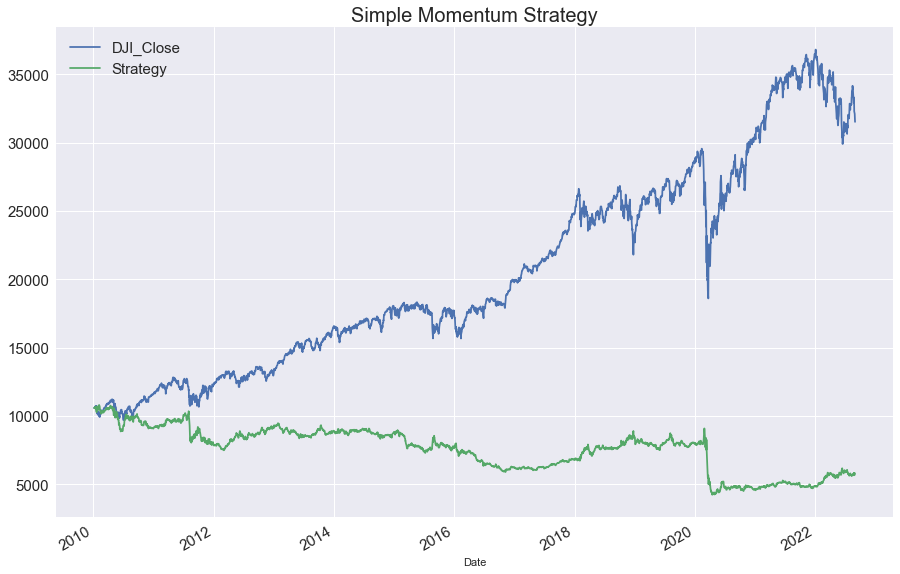

In [57]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize= 15)
plt.title("Simple Momentum Strategy", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [58]:
def summary_ann(returns):         #annulized risk and return
    summary = returns.agg(["mean", "std"]).T  #mean daily return & standard deviation of returns
    summary["Return"] = summary["mean"]*252         #252 trading days of the year
    summary["Risk"] = summary["std"]*np.sqrt(252) #the positive square-root of an array, element-wise
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [59]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.101074,0.171615
Strategy_Ret,-0.032722,0.171722


## Backtesting a simple Contrarian Strategy

In [60]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000
2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000
2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,10573.679688,186040000
2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,10606.860352,217390000
2010-01-08,10606.400391,10619.400391,10554.330078,10618.190430,10618.190430,172710000
...,...,...,...,...,...,...
2022-08-25,33029.269531,33306.089844,32889.851562,33291.781250,33291.781250,308530000
2022-08-26,33293.429688,33364.699219,32278.220703,32283.400391,32283.400391,352850000
2022-08-29,32188.000000,32325.160156,31972.789062,32098.990234,32098.990234,317820000


In [61]:
# pct_change() returns a DataFrame with the percentage difference 
#between the values for each row and, by default, the previous row.
#dropna() method removes the rows that contains NULL values
df = data.loc["2010":,"Close"].to_frame()
df["DJI_Return"]=df.Close.pct_change()
df.columns=["DJI_Close","DJI_Return"]
df.dropna(inplace=True)
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2022-08-25,33291.781250,0.009783
2022-08-26,32283.400391,-0.030289
2022-08-29,32098.990234,-0.005712


In [62]:
df["Position"] = -np.sign(df["DJI_Return"])
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,1.0
2010-01-06,10573.679688,0.000157,-1.0
2010-01-07,10606.860352,0.003138,-1.0
2010-01-08,10618.190430,0.001068,-1.0
2010-01-11,10663.990234,0.004313,-1.0
...,...,...,...
2022-08-25,33291.781250,0.009783,-1.0
2022-08-26,32283.400391,-0.030289,1.0
2022-08-29,32098.990234,-0.005712,1.0


In [63]:
df["Strategy_Ret"]=df["Position"].shift()*df["DJI_Return"]
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,1.0,NaN
2010-01-06,10573.679688,0.000157,-1.0,0.000157
2010-01-07,10606.860352,0.003138,-1.0,-0.003138
2010-01-08,10618.190430,0.001068,-1.0,-0.001068
2010-01-11,10663.990234,0.004313,-1.0,-0.004313
...,...,...,...,...
2022-08-25,33291.781250,0.009783,-1.0,-0.009783
2022-08-26,32283.400391,-0.030289,1.0,0.030289
2022-08-29,32098.990234,-0.005712,1.0,-0.005712


In [64]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]]) #annulized risk & return

,Return,Risk
DJI_Return,0.101074,0.171615
Strategy_Ret,0.032722,0.171722


In [65]:
df["Position"] = np.where(df["DJI_Return"]>0.01, -1, 1)
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,1,NaN
2010-01-06,10573.679688,0.000157,1,0.000157
2010-01-07,10606.860352,0.003138,1,-0.003138
2010-01-08,10618.190430,0.001068,1,-0.001068
2010-01-11,10663.990234,0.004313,1,-0.004313
...,...,...,...,...
2022-08-25,33291.781250,0.009783,1,-0.009783
2022-08-26,32283.400391,-0.030289,1,0.030289
2022-08-29,32098.990234,-0.005712,1,-0.005712


In [66]:
df["Strategy_Ret"]=df["Position"].shift()*df["DJI_Return"]
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,1,NaN
2010-01-06,10573.679688,0.000157,1,0.000157
2010-01-07,10606.860352,0.003138,1,0.003138
2010-01-08,10618.190430,0.001068,1,0.001068
2010-01-11,10663.990234,0.004313,1,0.004313
...,...,...,...,...
2022-08-25,33291.781250,0.009783,1,0.009783
2022-08-26,32283.400391,-0.030289,1,-0.030289
2022-08-29,32098.990234,-0.005712,1,-0.005712


In [67]:
df["Strategy"]=df.Strategy_Ret.add(1, fill_value=0).cumprod()*df.iloc[0, 0]
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,1,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1,0.000157,10573.679688
2010-01-07,10606.860352,0.003138,1,0.003138,10606.860352
2010-01-08,10618.190430,0.001068,1,0.001068,10618.190430
2010-01-11,10663.990234,0.004313,1,0.004313,10663.990234
...,...,...,...,...,...
2022-08-25,33291.781250,0.009783,1,0.009783,88664.378587
2022-08-26,32283.400391,-0.030289,1,-0.030289,85978.806986
2022-08-29,32098.990234,-0.005712,1,-0.005712,85487.676404


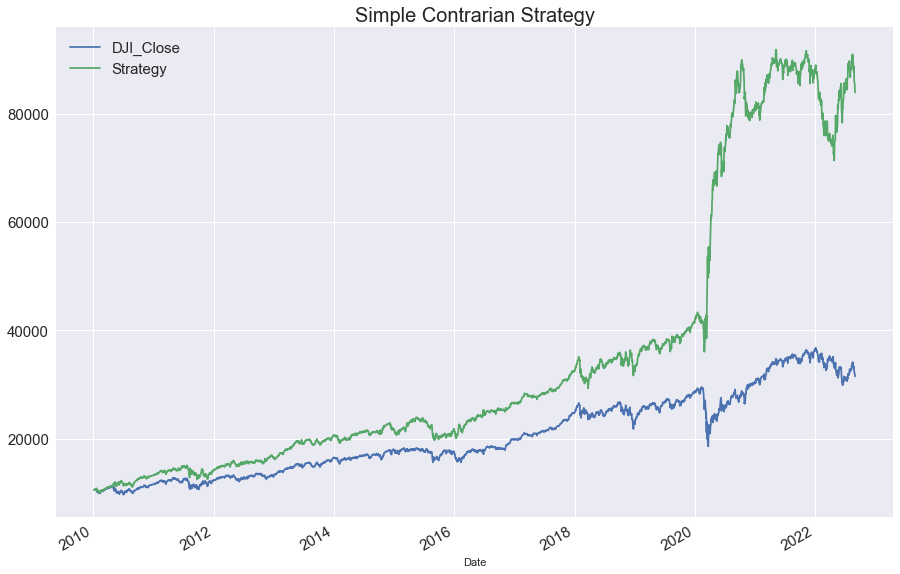

In [68]:
df[["DJI_Close", "Strategy"]].plot(figsize=(15, 10), fontsize=15)
plt.legend(fontsize=15)
plt.title("Simple Contrarian Strategy", fontsize = 20)
plt.show()

In [69]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.101074,0.171615
Strategy_Ret,0.178525,0.171391


## simple moving average crossover(SMA)

In [70]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000
2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000
2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,10573.679688,186040000
2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,10606.860352,217390000
2010-01-08,10606.400391,10619.400391,10554.330078,10618.190430,10618.190430,172710000
...,...,...,...,...,...,...
2022-08-25,33029.269531,33306.089844,32889.851562,33291.781250,33291.781250,308530000
2022-08-26,33293.429688,33364.699219,32278.220703,32283.400391,32283.400391,352850000
2022-08-29,32188.000000,32325.160156,31972.789062,32098.990234,32098.990234,317820000


In [71]:
df=data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2022-08-25,33291.781250,0.009783
2022-08-26,32283.400391,-0.030289
2022-08-29,32098.990234,-0.005712


In [72]:
df.DJI_close.rolling(window = 50).mean()

Date
2010-01-05             NaN
2010-01-06             NaN
2010-01-07             NaN
2010-01-08             NaN
2010-01-11             NaN
                  ...     
2022-08-25    32002.171172
2022-08-26    32034.468594
2022-08-29    32077.906992
2022-08-30    32115.948789
2022-08-31    32135.552383
Name: DJI_close, Length: 3187, dtype: float64

In [73]:
df["SMA50"] = df.DJI_close.rolling(window = 50).mean()

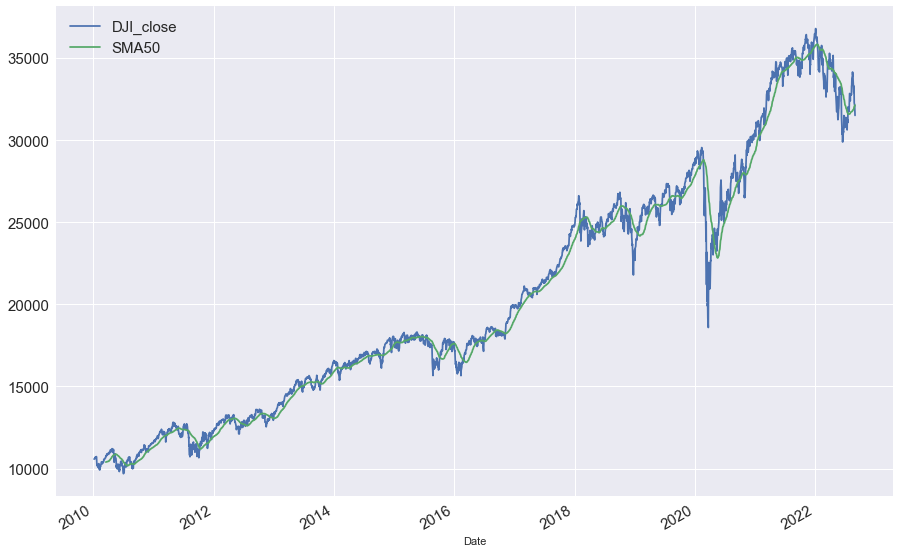

In [74]:
df[["DJI_close", "SMA50"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [75]:
df["SMA200"] = df.DJI_close.rolling(window = 200).mean() 

In [76]:
df

,DJI_close,DJI_Return,SMA50,SMA200
Date,,,,
2010-01-05,10572.019531,-0.001128,NaN,NaN
2010-01-06,10573.679688,0.000157,NaN,NaN
2010-01-07,10606.860352,0.003138,NaN,NaN
2010-01-08,10618.190430,0.001068,NaN,NaN
2010-01-11,10663.990234,0.004313,NaN,NaN
...,...,...,...,...
2022-08-25,33291.781250,0.009783,32002.171172,33794.705977
2022-08-26,32283.400391,-0.030289,32034.468594,33774.523076
2022-08-29,32098.990234,-0.005712,32077.906992,33754.618320


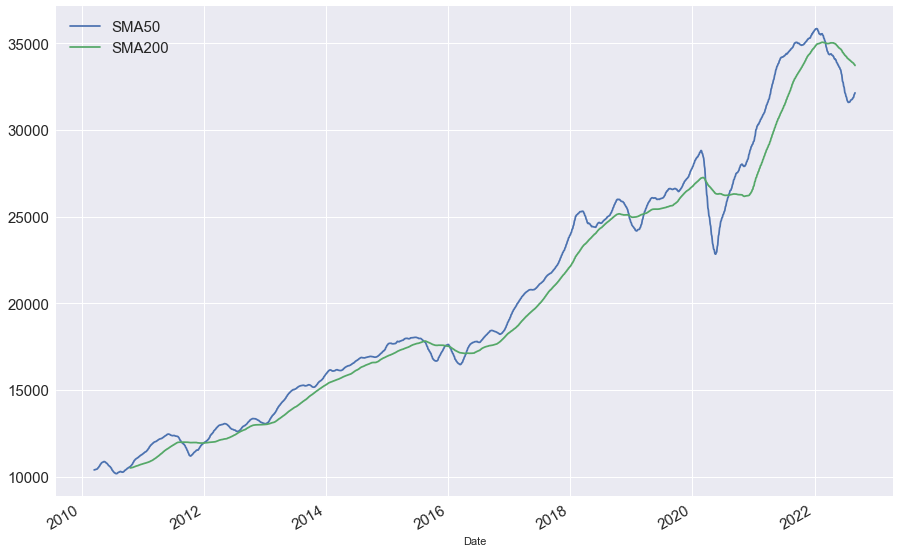

In [77]:
df[["SMA50", "SMA200"]].plot(figsize = (15, 10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

In [78]:
df.dropna(inplace = True)
df

,DJI_close,DJI_Return,SMA50,SMA200
Date,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200
...,...,...,...,...
2022-08-25,33291.781250,0.009783,32002.171172,33794.705977
2022-08-26,32283.400391,-0.030289,32034.468594,33774.523076
2022-08-29,32098.990234,-0.005712,32077.906992,33754.618320


## Part TWO

In [79]:
df["Position"] = np.sign(df.SMA50.sub(df.SMA200))

In [80]:
df

,DJI_close,DJI_Return,SMA50,SMA200,Position
Date,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0
...,...,...,...,...,...
2022-08-25,33291.781250,0.009783,32002.171172,33794.705977,-1.0
2022-08-26,32283.400391,-0.030289,32034.468594,33774.523076,-1.0
2022-08-29,32098.990234,-0.005712,32077.906992,33754.618320,-1.0


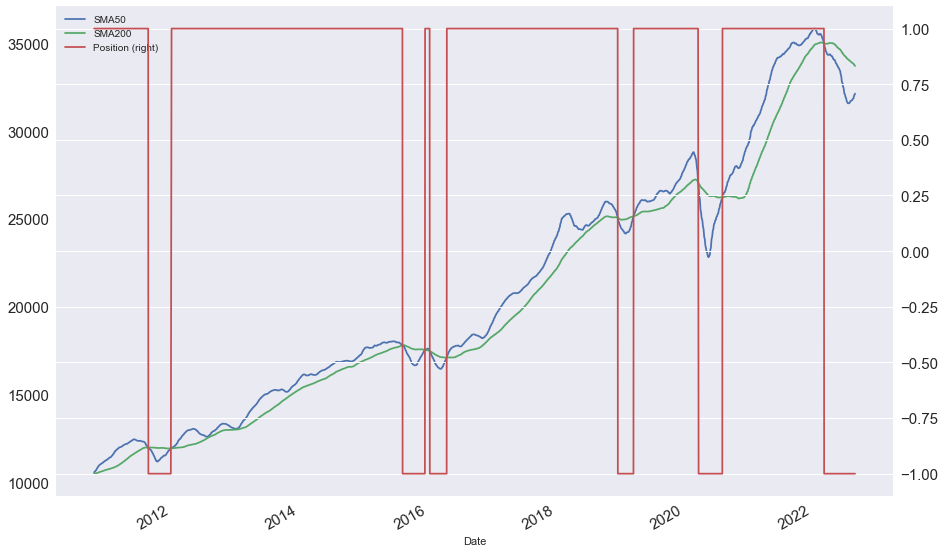

In [81]:
df[["SMA50", "SMA200", "Position"]].plot(figsize=(15, 10), secondary_y="Position", fontsize=15)
plt.show()

In [82]:
df["Strategy_Ret"]= df["Position"].shift()*df["DJI_Return"]
df

,DJI_close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret
Date,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0,NaN
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0,0.011782
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0,0.003475
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0,-0.001257
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0,0.002829
...,...,...,...,...,...,...
2022-08-25,33291.781250,0.009783,32002.171172,33794.705977,-1.0,-0.009783
2022-08-26,32283.400391,-0.030289,32034.468594,33774.523076,-1.0,0.030289
2022-08-29,32098.990234,-0.005712,32077.906992,33754.618320,-1.0,0.005712


In [83]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod()*df.iloc[0, 0]
df

,DJI_close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0,0.011782,11107.969727
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0,0.003475,11146.570312
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0,-0.001257,11132.559570
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0,0.002829,11164.049805
...,...,...,...,...,...,...,...
2022-08-25,33291.781250,0.009783,32002.171172,33794.705977,-1.0,-0.009783,6995.678986
2022-08-26,32283.400391,-0.030289,32034.468594,33774.523076,-1.0,0.030289,7207.572388
2022-08-29,32098.990234,-0.005712,32077.906992,33754.618320,-1.0,0.005712,7248.743687


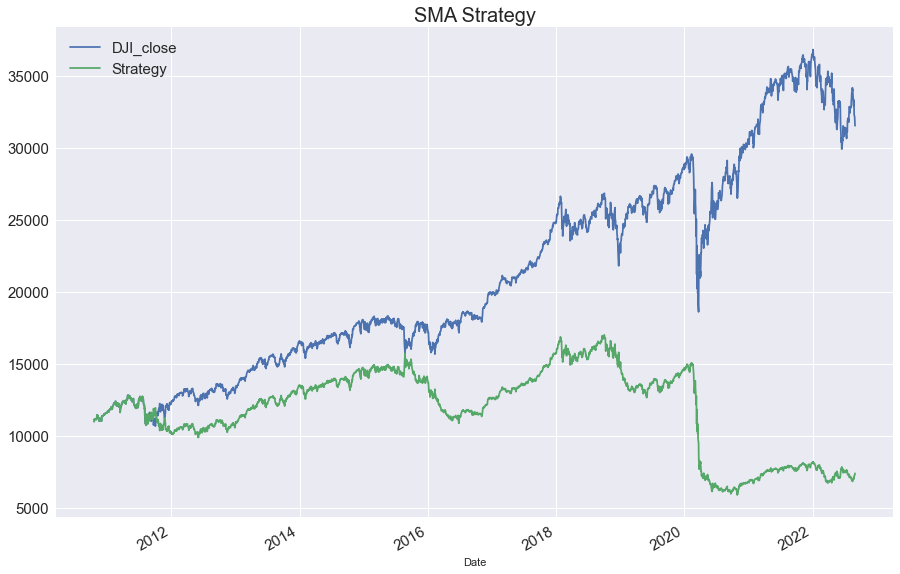

In [84]:
df[["DJI_close", "Strategy"]].plot(figsize=(15, 10), fontsize=15)
plt.legend(fontsize=15)
plt.title("SMA Strategy", fontsize=20)
plt.show()

In [85]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.102480,0.171632
Strategy_Ret,-0.018551,0.171725


In [86]:
df["Position"] = -np.sign(df.SMA50.sub(df.SMA200))
df

,DJI_close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,-1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,-1.0,0.011782,11107.969727
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,-1.0,0.003475,11146.570312
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,-1.0,-0.001257,11132.559570
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,-1.0,0.002829,11164.049805
...,...,...,...,...,...,...,...
2022-08-25,33291.781250,0.009783,32002.171172,33794.705977,1.0,-0.009783,6995.678986
2022-08-26,32283.400391,-0.030289,32034.468594,33774.523076,1.0,0.030289,7207.572388
2022-08-29,32098.990234,-0.005712,32077.906992,33754.618320,1.0,0.005712,7248.743687


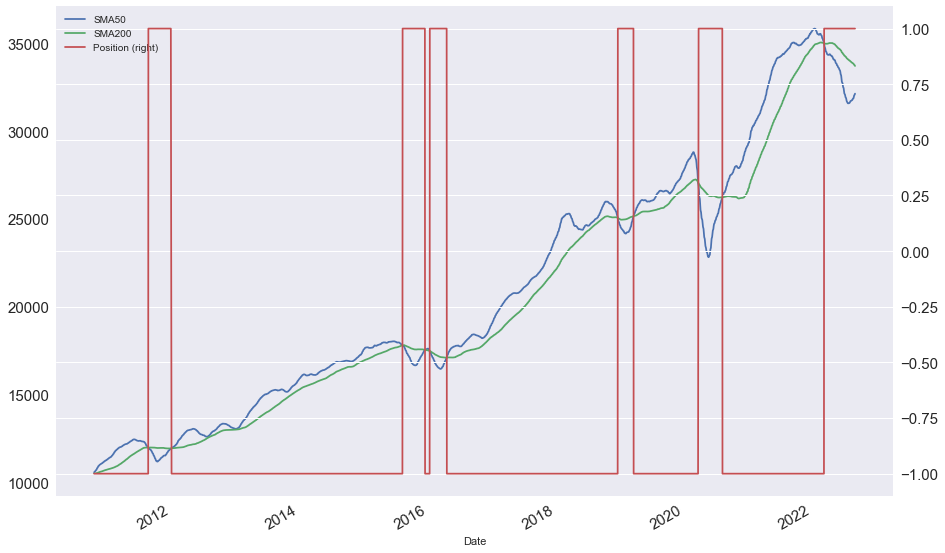

In [87]:
df[["SMA50", "SMA200", "Position"]].plot(figsize=(15, 10), secondary_y="Position", fontsize=15)
plt.show()

In [88]:
df["Strategy_Ret"]= df["Position"].shift()*df["DJI_Return"]
df

,DJI_close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,-1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,-1.0,-0.011782,11107.969727
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,-1.0,-0.003475,11146.570312
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,-1.0,0.001257,11132.559570
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,-1.0,-0.002829,11164.049805
...,...,...,...,...,...,...,...
2022-08-25,33291.781250,0.009783,32002.171172,33794.705977,1.0,0.009783,6995.678986
2022-08-26,32283.400391,-0.030289,32034.468594,33774.523076,1.0,-0.030289,7207.572388
2022-08-29,32098.990234,-0.005712,32077.906992,33754.618320,1.0,-0.005712,7248.743687


In [89]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod()*df.iloc[0, 0]
df

,DJI_close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,-1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,-1.0,-0.011782,10849.270508
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,-1.0,-0.003475,10811.568911
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,-1.0,0.001257,10825.158571
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,-1.0,-0.002829,10794.537870
...,...,...,...,...,...,...,...
2022-08-25,33291.781250,0.009783,32002.171172,33794.705977,1.0,0.009783,12155.913719
2022-08-26,32283.400391,-0.030289,32034.468594,33774.523076,1.0,-0.030289,11787.721022
2022-08-29,32098.990234,-0.005712,32077.906992,33754.618320,1.0,-0.005712,11720.386868


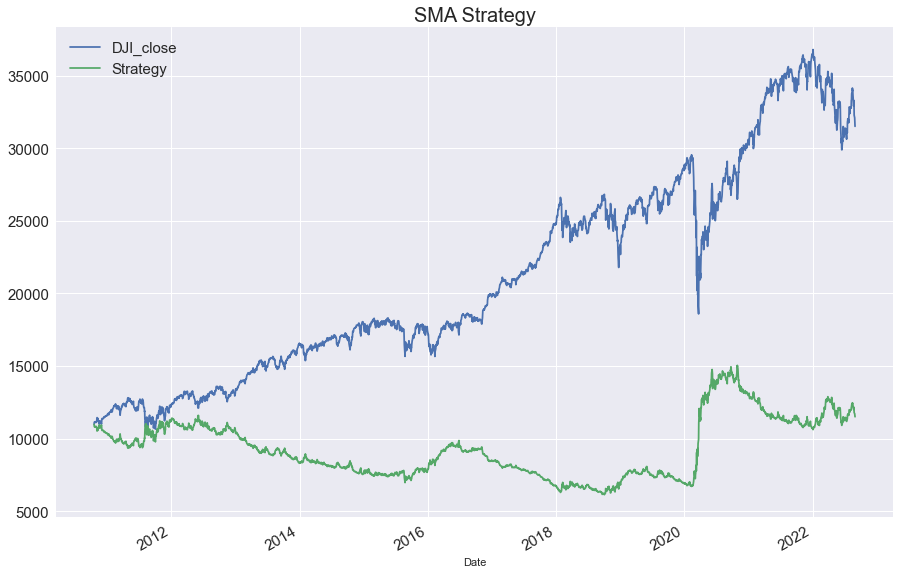

In [90]:
df[["DJI_close", "Strategy"]].plot(figsize=(15, 10), fontsize=15)
plt.legend(fontsize=15)
plt.title("SMA Strategy", fontsize=20)
plt.show()

In [91]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.102480,0.171632
Strategy_Ret,0.018551,0.171725


## backtesting the perfect Strategy

In [92]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000
2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000
2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,10573.679688,186040000
2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,10606.860352,217390000
2010-01-08,10606.400391,10619.400391,10554.330078,10618.190430,10618.190430,172710000
...,...,...,...,...,...,...
2022-08-25,33029.269531,33306.089844,32889.851562,33291.781250,33291.781250,308530000
2022-08-26,33293.429688,33364.699219,32278.220703,32283.400391,32283.400391,352850000
2022-08-29,32188.000000,32325.160156,31972.789062,32098.990234,32098.990234,317820000


In [93]:
df=data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2022-08-25,33291.781250,0.009783
2022-08-26,32283.400391,-0.030289
2022-08-29,32098.990234,-0.005712


In [94]:
df["Position"] = np.sign(df["DJI_Return"])
df

,DJI_close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,-1.0
2010-01-06,10573.679688,0.000157,1.0
2010-01-07,10606.860352,0.003138,1.0
2010-01-08,10618.190430,0.001068,1.0
2010-01-11,10663.990234,0.004313,1.0
...,...,...,...
2022-08-25,33291.781250,0.009783,1.0
2022-08-26,32283.400391,-0.030289,-1.0
2022-08-29,32098.990234,-0.005712,-1.0


In [95]:
df["Strategy_Ret"]=df["Position"]*df["DJI_Return"]
df

,DJI_close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,-1.0,0.001128
2010-01-06,10573.679688,0.000157,1.0,0.000157
2010-01-07,10606.860352,0.003138,1.0,0.003138
2010-01-08,10618.190430,0.001068,1.0,0.001068
2010-01-11,10663.990234,0.004313,1.0,0.004313
...,...,...,...,...
2022-08-25,33291.781250,0.009783,1.0,0.009783
2022-08-26,32283.400391,-0.030289,-1.0,0.030289
2022-08-29,32098.990234,-0.005712,-1.0,0.005712


In [96]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value=0).cumprod()*df.iloc[0, 0]
df

,DJI_close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,0.001128,1.058395e+04
2010-01-06,10573.679688,0.000157,1.0,0.000157,1.058561e+04
2010-01-07,10606.860352,0.003138,1.0,0.003138,1.061883e+04
2010-01-08,10618.190430,0.001068,1.0,0.001068,1.063017e+04
2010-01-11,10663.990234,0.004313,1.0,0.004313,1.067602e+04
...,...,...,...,...,...
2022-08-25,33291.781250,0.009783,1.0,0.009783,3.389789e+13
2022-08-26,32283.400391,-0.030289,-1.0,0.030289,3.492463e+13
2022-08-29,32098.990234,-0.005712,-1.0,0.005712,3.512412e+13


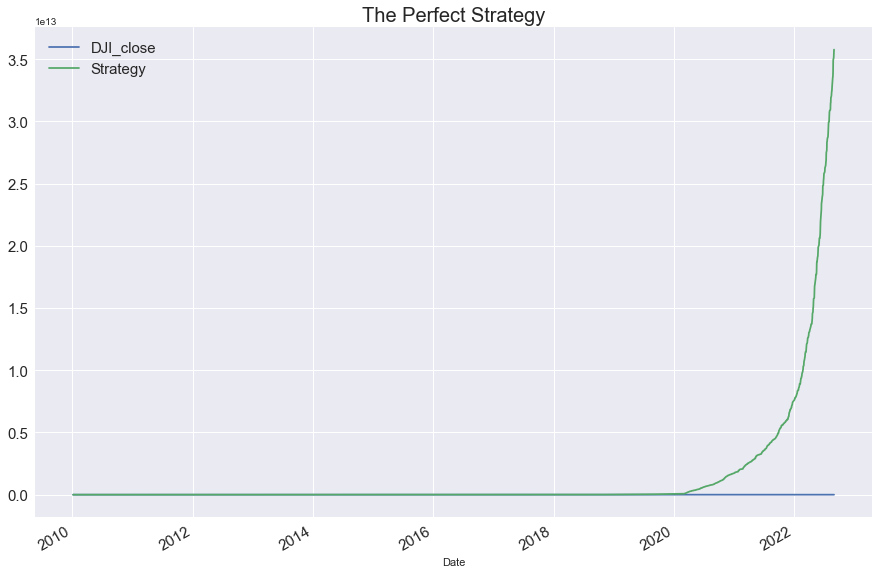

In [97]:
df[["DJI_close", "Strategy"]].plot(figsize = (15, 10), fontsize=15)
plt.legend(fontsize=15)
plt.title("The Perfect Strategy", fontsize=20)
plt.show()

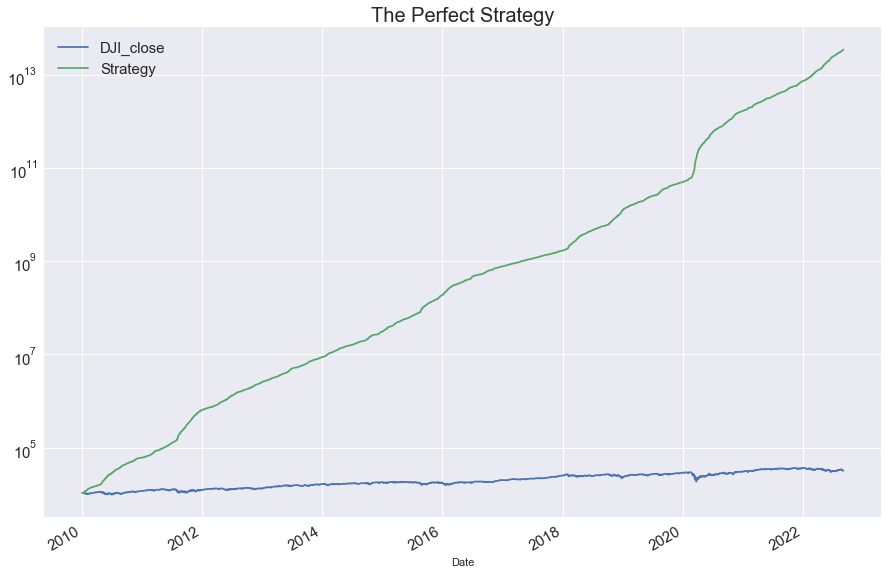

In [98]:
df[["DJI_close", "Strategy"]].plot(figsize = (15, 10), fontsize=15, logy=True)
plt.legend(fontsize=15)
plt.title("The Perfect Strategy", fontsize=20)
plt.show()

In [99]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.101074,0.171615
Strategy_Ret,1.749398,0.131697


# Project 11

In [100]:
import pandas as pd

In [101]:
const = pd.read_csv("const_prices.csv", parse_dates=["Date"], index_col="Date")
const

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.643214,57.720001,40.919998,56.180000,58.549999,18.705000,24.690001,79.059998,32.070000,NaN,...,35.314884,30.950001,16.337500,61.119999,49.810001,31.530001,22.035000,31.212946,37.299999,54.230000
2010-01-05,7.656429,57.220001,40.830002,58.020000,59.250000,18.625000,24.580000,79.620003,31.990000,NaN,...,35.458015,30.959999,16.402500,61.139999,48.630001,31.480000,21.782499,31.269218,37.000000,53.689999
2010-01-06,7.534643,56.790001,41.490002,59.779999,59.430000,18.592501,24.420000,79.629997,31.820000,NaN,...,35.935116,30.770000,16.302500,60.849998,47.939999,31.790001,21.490000,29.937416,36.720001,53.570000
2010-01-07,7.520714,56.270000,41.980000,62.200001,59.669998,18.510000,24.530001,79.330002,31.830000,NaN,...,35.992367,30.450001,16.462500,60.520000,48.630001,33.009998,21.690001,29.759218,36.939999,53.599998
2010-01-08,7.570714,56.770000,41.950001,61.599998,60.340000,18.537500,24.660000,79.470001,31.879999,NaN,...,35.973282,30.660000,16.430000,60.439999,48.560001,32.700001,21.750000,29.777975,36.990002,53.330002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,170.029999,245.679993,162.229996,169.380005,198.880005,173.910004,47.270000,164.619995,117.459999,55.759998,...,90.269997,278.850006,113.220001,145.699997,168.979996,541.570007,209.820007,43.740002,36.799999,135.869995
2022-08-26,163.619995,240.649994,157.309998,164.529999,191.919998,165.229996,45.889999,163.410004,114.070000,54.459999,...,89.260002,268.089996,108.279999,142.289993,166.839996,529.250000,202.889999,43.250000,36.000000,131.600006
2022-08-29,161.380005,239.380005,154.539993,165.419998,191.779999,160.210007,45.709999,164.630005,113.529999,53.570000,...,87.589996,265.230011,107.879997,141.690002,165.360001,529.770020,202.330002,43.330002,35.959999,132.880005


In [102]:
const.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3188 entries, 2010-01-04 to 2022-08-31
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3188 non-null   float64
 1   AMGN    3188 non-null   float64
 2   AXP     3188 non-null   float64
 3   BA      3188 non-null   float64
 4   CAT     3188 non-null   float64
 5   CRM     3188 non-null   float64
 6   CSCO    3188 non-null   float64
 7   CVX     3188 non-null   float64
 8   DIS     3188 non-null   float64
 9   DOW     871 non-null    float64
 10  GS      3188 non-null   float64
 11  HD      3188 non-null   float64
 12  HON     3188 non-null   float64
 13  IBM     3188 non-null   float64
 14  INTC    3188 non-null   float64
 15  JNJ     3188 non-null   float64
 16  JPM     3188 non-null   float64
 17  KO      3188 non-null   float64
 18  MCD     3188 non-null   float64
 19  MMM     3188 non-null   float64
 20  MRK     3188 non-null   float64
 21  MSFT    3188 non-nu

In [103]:
dji=pd.read_csv("dji.csv", parse_dates=["Date"], index_col="Date")
dji

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000
2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000
2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,10573.679688,186040000
2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,10606.860352,217390000
2010-01-08,10606.400391,10619.400391,10554.330078,10618.190430,10618.190430,172710000
...,...,...,...,...,...,...
2022-08-25,33029.269531,33306.089844,32889.851562,33291.781250,33291.781250,308530000
2022-08-26,33293.429688,33364.699219,32278.220703,32283.400391,32283.400391,352850000
2022-08-29,32188.000000,32325.160156,31972.789062,32098.990234,32098.990234,317820000


In [104]:
dji.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3188 entries, 2010-01-04 to 2022-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3188 non-null   float64
 1   High       3188 non-null   float64
 2   Low        3188 non-null   float64
 3   Close      3188 non-null   float64
 4   Adj Close  3188 non-null   float64
 5   Volume     3188 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 174.3 KB


In [105]:
dji=dji.Close.to_frame().copy()

In [106]:
dji

,Close
Date,
2010-01-04,10583.959961
2010-01-05,10572.019531
2010-01-06,10573.679688
2010-01-07,10606.860352
2010-01-08,10618.190430
...,...
2022-08-25,33291.781250
2022-08-26,32283.400391
2022-08-29,32098.990234


In [107]:
#concat(): combine similar datasets from Series, DataFrame and Panel objects within the Pandas library
#"close" column has been added to the gow jones 30 constituents data frame
df=pd.concat([const, dji], axis=1)
df

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,Close
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.643214,57.720001,40.919998,56.180000,58.549999,18.705000,24.690001,79.059998,32.070000,NaN,...,30.950001,16.337500,61.119999,49.810001,31.530001,22.035000,31.212946,37.299999,54.230000,10583.959961
2010-01-05,7.656429,57.220001,40.830002,58.020000,59.250000,18.625000,24.580000,79.620003,31.990000,NaN,...,30.959999,16.402500,61.139999,48.630001,31.480000,21.782499,31.269218,37.000000,53.689999,10572.019531
2010-01-06,7.534643,56.790001,41.490002,59.779999,59.430000,18.592501,24.420000,79.629997,31.820000,NaN,...,30.770000,16.302500,60.849998,47.939999,31.790001,21.490000,29.937416,36.720001,53.570000,10573.679688
2010-01-07,7.520714,56.270000,41.980000,62.200001,59.669998,18.510000,24.530001,79.330002,31.830000,NaN,...,30.450001,16.462500,60.520000,48.630001,33.009998,21.690001,29.759218,36.939999,53.599998,10606.860352
2010-01-08,7.570714,56.770000,41.950001,61.599998,60.340000,18.537500,24.660000,79.470001,31.879999,NaN,...,30.660000,16.430000,60.439999,48.560001,32.700001,21.750000,29.777975,36.990002,53.330002,10618.190430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,170.029999,245.679993,162.229996,169.380005,198.880005,173.910004,47.270000,164.619995,117.459999,55.759998,...,278.850006,113.220001,145.699997,168.979996,541.570007,209.820007,43.740002,36.799999,135.869995,33291.781250
2022-08-26,163.619995,240.649994,157.309998,164.529999,191.919998,165.229996,45.889999,163.410004,114.070000,54.459999,...,268.089996,108.279999,142.289993,166.839996,529.250000,202.889999,43.250000,36.000000,131.600006,32283.400391
2022-08-29,161.380005,239.380005,154.539993,165.419998,191.779999,160.210007,45.709999,164.630005,113.529999,53.570000,...,265.230011,107.879997,141.690002,165.360001,529.770020,202.330002,43.330002,35.959999,132.880005,32098.990234


In [108]:
df.rename(columns={"Close": "DJI"}, inplace=True)

In [109]:
more_info=pd.read_csv("const.csv")
more_info

,Company,Exchange,Symbol,Industry,Date_Added,Ticker
0,3M,NYSE,MMM,Conglomerate,1976-08-09,MMM
1,American Express,NYSE,AXP,Financial services,1982-08-30,AXP
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,AMGN
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,AAPL
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,BA
5,Caterpillar,NYSE,CAT,Construction and Mining,1991-05-06,CAT
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,CVX
7,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,CSCO
8,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,KO
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06,DIS


In [110]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn")

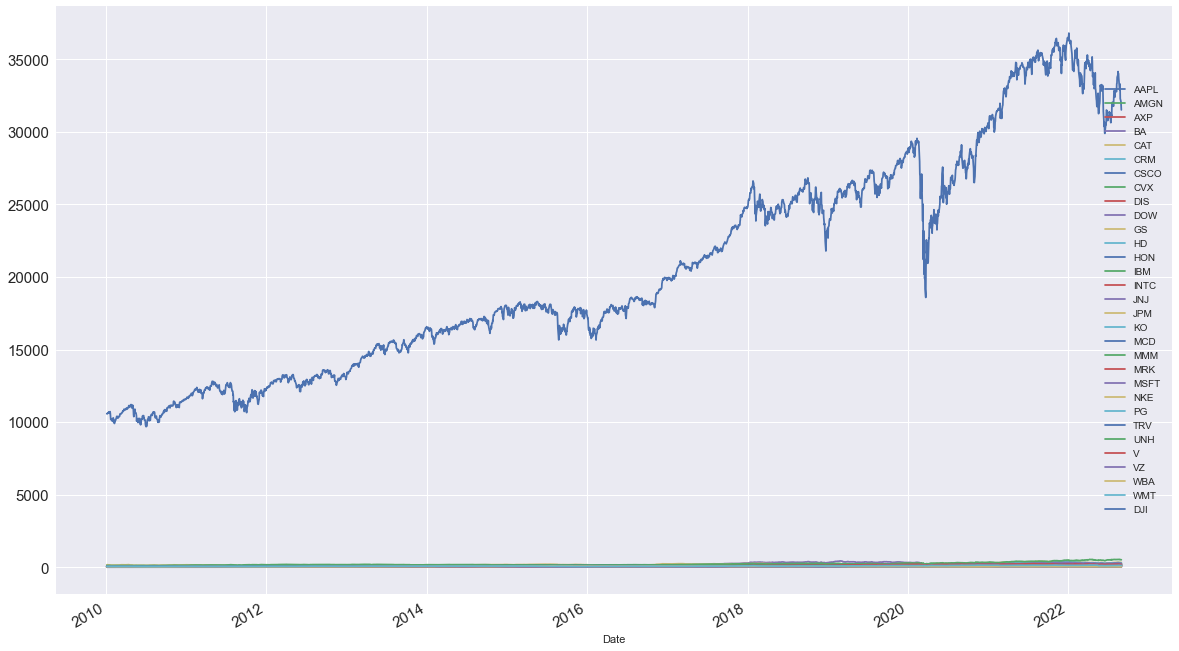

In [111]:
df.plot(figsize=(20, 12), fontsize=15)
plt.show()

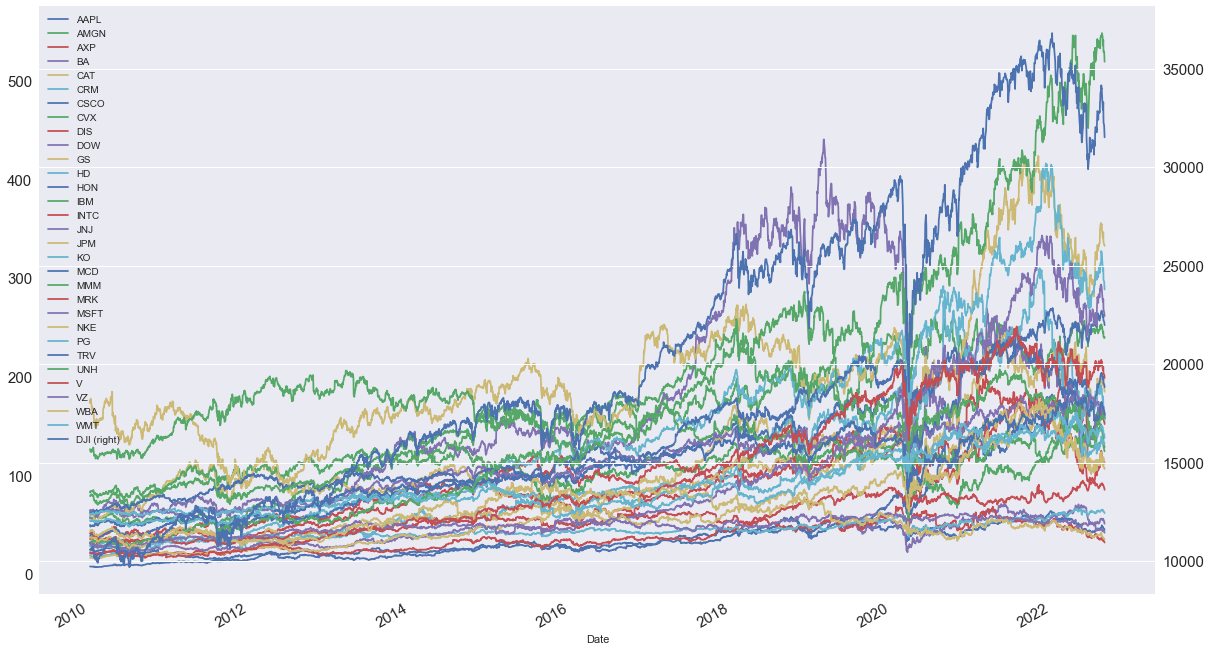

In [112]:
df.plot(figsize=(20, 12), fontsize=15, secondary_y="DJI")
plt.show()

In [113]:
#its better to normalize prices to common base value like 100
#if we devide all rows to the first row
#and then multiply each element to 100
df.div(df.iloc[0]).mul(100) 

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.172893,99.133749,99.780068,103.275187,101.195561,99.572307,99.554473,100.708329,99.750546,NaN,...,100.032305,100.397861,100.032723,97.630997,99.841417,98.854093,100.180286,99.195712,99.004239,99.887184
2010-01-06,98.579511,98.388773,101.392971,106.407972,101.502991,99.398561,98.906438,100.720971,99.220455,NaN,...,99.418416,99.785770,99.558245,96.245728,100.824612,97.526662,95.913459,98.445046,98.782962,99.902869
2010-01-07,98.397266,97.487871,102.590424,110.715558,101.912893,98.957500,99.351965,100.341518,99.251638,NaN,...,98.384491,100.765111,99.018327,97.630997,104.693935,98.434312,95.342549,99.034851,98.838279,100.216369
2010-01-08,99.051443,98.354122,102.517113,109.647558,103.057218,99.104520,99.878491,100.518598,99.407544,NaN,...,99.063002,100.566186,98.887434,97.490464,103.710752,98.706604,95.402642,99.168907,98.340406,100.323418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,2224.587638,425.641004,396.456508,301.495201,339.675504,929.751427,191.454028,208.221604,366.261304,NaN,...,900.969303,693.006910,238.383507,339.249129,1717.633985,952.212429,140.134167,98.659517,250.543972,314.549388
2022-08-26,2140.722349,416.926523,384.433051,292.862225,327.788216,883.346680,185.864716,206.691132,355.690679,NaN,...,866.203521,662.769710,232.804312,334.952804,1678.560065,920.762427,138.564300,96.514747,242.670122,305.021944
2022-08-29,2111.415435,414.726264,377.663735,294.446417,327.549106,856.508994,185.135675,208.234265,354.006860,NaN,...,856.962858,660.321345,231.822652,331.981522,1680.209350,918.221027,138.820610,96.407506,245.030437,303.279589


In [114]:
norm=df.div(df.iloc[0]).mul(100)
norm

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.172893,99.133749,99.780068,103.275187,101.195561,99.572307,99.554473,100.708329,99.750546,NaN,...,100.032305,100.397861,100.032723,97.630997,99.841417,98.854093,100.180286,99.195712,99.004239,99.887184
2010-01-06,98.579511,98.388773,101.392971,106.407972,101.502991,99.398561,98.906438,100.720971,99.220455,NaN,...,99.418416,99.785770,99.558245,96.245728,100.824612,97.526662,95.913459,98.445046,98.782962,99.902869
2010-01-07,98.397266,97.487871,102.590424,110.715558,101.912893,98.957500,99.351965,100.341518,99.251638,NaN,...,98.384491,100.765111,99.018327,97.630997,104.693935,98.434312,95.342549,99.034851,98.838279,100.216369
2010-01-08,99.051443,98.354122,102.517113,109.647558,103.057218,99.104520,99.878491,100.518598,99.407544,NaN,...,99.063002,100.566186,98.887434,97.490464,103.710752,98.706604,95.402642,99.168907,98.340406,100.323418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,2224.587638,425.641004,396.456508,301.495201,339.675504,929.751427,191.454028,208.221604,366.261304,NaN,...,900.969303,693.006910,238.383507,339.249129,1717.633985,952.212429,140.134167,98.659517,250.543972,314.549388
2022-08-26,2140.722349,416.926523,384.433051,292.862225,327.788216,883.346680,185.864716,206.691132,355.690679,NaN,...,866.203521,662.769710,232.804312,334.952804,1678.560065,920.762427,138.564300,96.514747,242.670122,305.021944
2022-08-29,2111.415435,414.726264,377.663735,294.446417,327.549106,856.508994,185.135675,208.234265,354.006860,NaN,...,856.962858,660.321345,231.822652,331.981522,1680.209350,918.221027,138.820610,96.407506,245.030437,303.279589


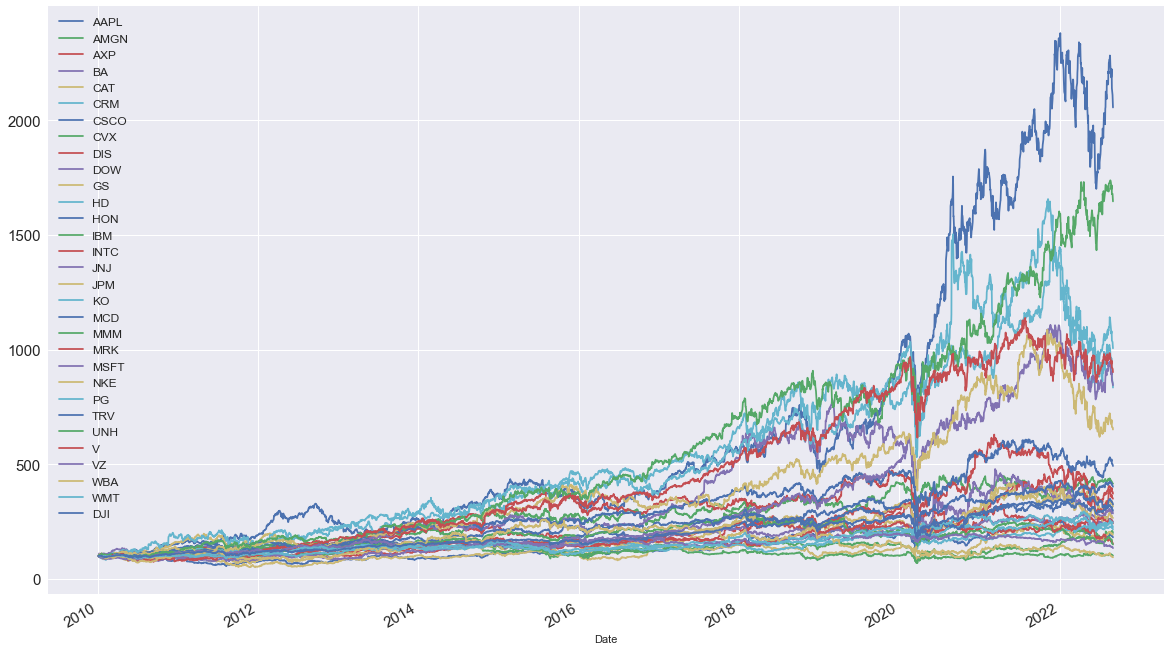

In [115]:
norm.plot(figsize=(20, 12), fontsize=15)
plt.legend(fontsize=12)
plt.show()

In [116]:
ret=df.pct_change()  #daily returns with percentage change method
ret

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.008663,-0.002199,0.032752,0.011956,-0.004277,-0.004455,0.007083,-0.002495,NaN,...,0.000323,0.003979,0.000327,-0.023690,-0.001586,-0.011459,0.001803,-0.008043,-0.009958,-0.001128
2010-01-06,-0.015906,-0.007515,0.016165,0.030334,0.003038,-0.001745,-0.006509,0.000126,-0.005314,NaN,...,-0.006137,-0.006097,-0.004743,-0.014189,0.009848,-0.013428,-0.042591,-0.007568,-0.002235,0.000157
2010-01-07,-0.001849,-0.009157,0.011810,0.040482,0.004038,-0.004437,0.004505,-0.003767,0.000314,NaN,...,-0.010400,0.009814,-0.005423,0.014393,0.038377,0.009307,-0.005952,0.005991,0.000560,0.003138
2010-01-08,0.006648,0.008886,-0.000715,-0.009646,0.011228,0.001486,0.005300,0.001765,0.001571,NaN,...,0.006897,-0.001974,-0.001322,-0.001439,-0.009391,0.002766,0.000630,0.001354,-0.005037,0.001068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,0.014923,0.004867,0.019481,0.035330,0.024310,-0.033887,0.004249,0.008763,0.009020,0.028024,...,0.011095,0.016246,-0.000823,0.002908,0.009525,0.015242,0.004363,0.000816,0.006668,0.009783
2022-08-26,-0.037699,-0.020474,-0.030327,-0.028634,-0.034996,-0.049911,-0.029194,-0.007350,-0.028861,-0.023314,...,-0.038587,-0.043632,-0.023404,-0.012664,-0.022749,-0.033028,-0.011203,-0.021739,-0.031427,-0.030289
2022-08-29,-0.013690,-0.005277,-0.017609,0.005409,-0.000729,-0.030382,-0.003922,0.007466,-0.004734,-0.016342,...,-0.010668,-0.003694,-0.004217,-0.008871,0.000983,-0.002760,0.001850,-0.001111,0.009726,-0.005712


In [117]:
ret.describe()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
count,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,870.000000,...,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000
mean,0.001109,0.000564,0.000582,0.000591,0.000531,0.000928,0.000330,0.000368,0.000521,0.000384,...,0.000800,0.000730,0.000316,0.000470,0.001010,0.000825,0.000155,0.000138,0.000356,0.000401
std,0.017885,0.015296,0.018534,0.022871,0.018420,0.022972,0.016871,0.017324,0.016058,0.026539,...,0.016147,0.016904,0.011011,0.014099,0.016130,0.016415,0.011244,0.017727,0.012279,0.010811
min,-0.128647,-0.095846,-0.148187,-0.238484,-0.142822,-0.158885,-0.162107,-0.221248,-0.129846,-0.216577,...,-0.147390,-0.116667,-0.087373,-0.208004,-0.172769,-0.135472,-0.067352,-0.143374,-0.113758,-0.129265
25%,-0.007410,-0.007332,-0.006951,-0.009190,-0.008500,-0.009679,-0.006878,-0.007431,-0.006662,-0.012523,...,-0.007106,-0.007344,-0.004780,-0.005781,-0.006959,-0.007183,-0.005884,-0.008110,-0.005282,-0.003763
50%,0.000893,0.000385,0.000741,0.000425,0.000398,0.000736,0.000407,0.000477,0.000453,0.000161,...,0.000588,0.000626,0.000369,0.000850,0.000964,0.001244,0.000343,0.000187,0.000500,0.000580
75%,0.010631,0.008455,0.008890,0.010146,0.010015,0.011866,0.008063,0.008319,0.007985,0.014343,...,0.009011,0.009057,0.005706,0.007283,0.008736,0.008908,0.006219,0.009158,0.006137,0.005283
max,0.119808,0.108977,0.218823,0.243186,0.103321,0.260449,0.159505,0.227407,0.144123,0.209091,...,0.142169,0.155314,0.120090,0.132903,0.127989,0.149973,0.076802,0.126036,0.117085,0.113650


In [118]:
def summary_ann(returns):
    summary=returns.agg(["mean", "std"]).T
    summary["Return"]=summary["mean"]*252 #calculating annual return
    summary["Risk"]=summary["std"]*np.sqrt(252)  
    summary.drop(columns=["mean", "std"], inplace=True) #drop some columns
    return summary

In [119]:
summary=summary_ann(ret)
summary

,Return,Risk
AAPL,0.279555,0.283920
AMGN,0.142182,0.242813
AXP,0.146731,0.294225
BA,0.148876,0.363069
CAT,0.133743,0.292401
CRM,0.233747,0.364669
CSCO,0.083082,0.267816
CVX,0.092832,0.275015
DIS,0.131349,0.254911
DOW,0.096678,0.421291


In [120]:
summary = summary.merge(more_info.loc[:, ["Ticker", "Company"]],
                       how="left", left_index=True, right_on="Ticker")

In [121]:
summary.set_index("Company", inplace = True)
summary

,Return,Risk,Ticker
Company,,,
Apple,0.279555,0.283920,AAPL
Amgen,0.142182,0.242813,AMGN
American Express,0.146731,0.294225,AXP
Boeing,0.148876,0.363069,BA
Caterpillar,0.133743,0.292401,CAT
Salesforce,0.233747,0.364669,CRM
Cisco,0.083082,0.267816,CSCO
Chevron,0.092832,0.275015,CVX
Disney,0.131349,0.254911,DIS


In [122]:
summary.rename(index={np.nan:"Dow Jones"}, inplace=True)

In [123]:
summary

,Return,Risk,Ticker
Company,,,
Apple,0.279555,0.283920,AAPL
Amgen,0.142182,0.242813,AMGN
American Express,0.146731,0.294225,AXP
Boeing,0.148876,0.363069,BA
Caterpillar,0.133743,0.292401,CAT
Salesforce,0.233747,0.364669,CRM
Cisco,0.083082,0.267816,CSCO
Chevron,0.092832,0.275015,CVX
Disney,0.131349,0.254911,DIS


## Explanatory Data Analysis

In [124]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3188 entries, 2010-01-04 to 2022-08-31
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3187 non-null   float64
 1   AMGN    3187 non-null   float64
 2   AXP     3187 non-null   float64
 3   BA      3187 non-null   float64
 4   CAT     3187 non-null   float64
 5   CRM     3187 non-null   float64
 6   CSCO    3187 non-null   float64
 7   CVX     3187 non-null   float64
 8   DIS     3187 non-null   float64
 9   DOW     870 non-null    float64
 10  GS      3187 non-null   float64
 11  HD      3187 non-null   float64
 12  HON     3187 non-null   float64
 13  IBM     3187 non-null   float64
 14  INTC    3187 non-null   float64
 15  JNJ     3187 non-null   float64
 16  JPM     3187 non-null   float64
 17  KO      3187 non-null   float64
 18  MCD     3187 non-null   float64
 19  MMM     3187 non-null   float64
 20  MRK     3187 non-null   float64
 21  MSFT    3187 non-nu

In [125]:
#return and risks are only based on time stamp
#DOW is not old enough so the data is not equal to others
#we will remove it
summary2=summary.drop(index="Dow Jones")
summary2

,Return,Risk,Ticker
Company,,,
Apple,0.279555,0.283920,AAPL
Amgen,0.142182,0.242813,AMGN
American Express,0.146731,0.294225,AXP
Boeing,0.148876,0.363069,BA
Caterpillar,0.133743,0.292401,CAT
Salesforce,0.233747,0.364669,CRM
Cisco,0.083082,0.267816,CSCO
Chevron,0.092832,0.275015,CVX
Disney,0.131349,0.254911,DIS


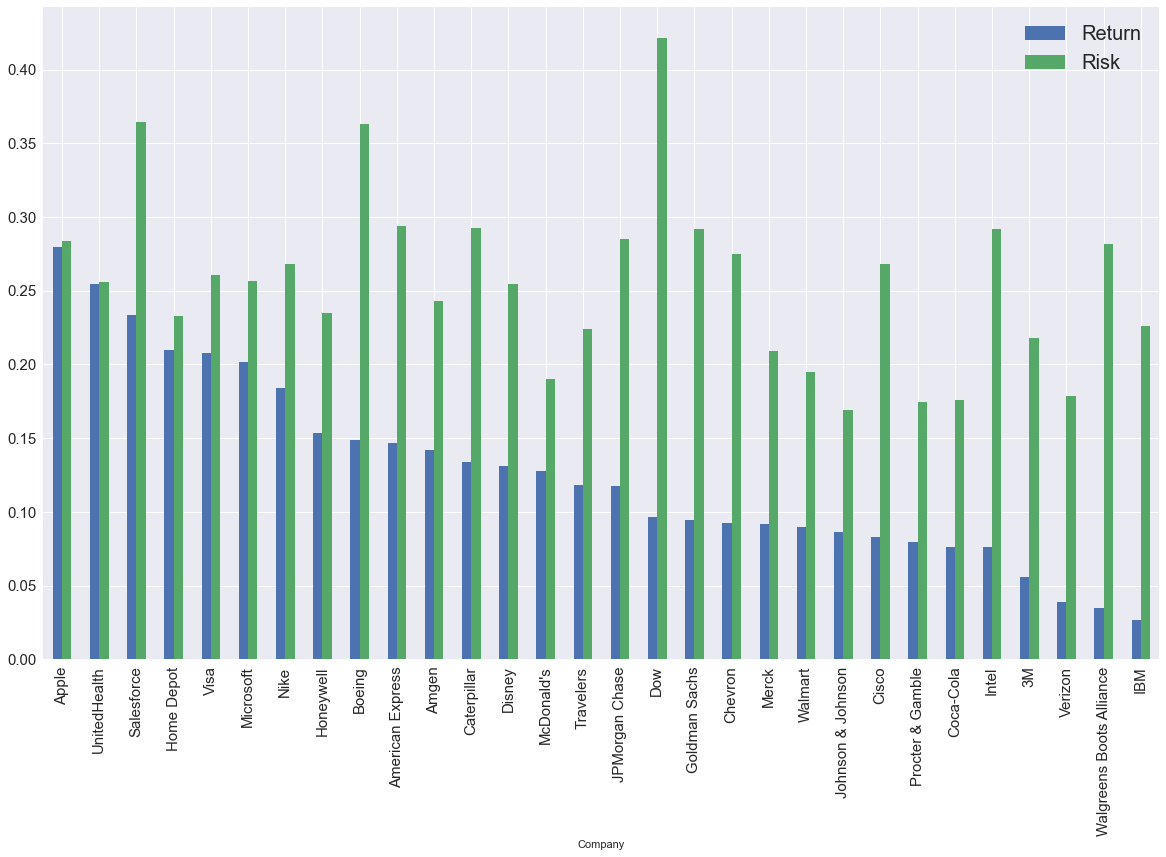

In [126]:
summary2.sort_values(by="Return", ascending = False).plot(kind="bar", 
                    figsize=(20, 12), fontsize = 15)
plt.legend(fontsize=20)
plt.show()

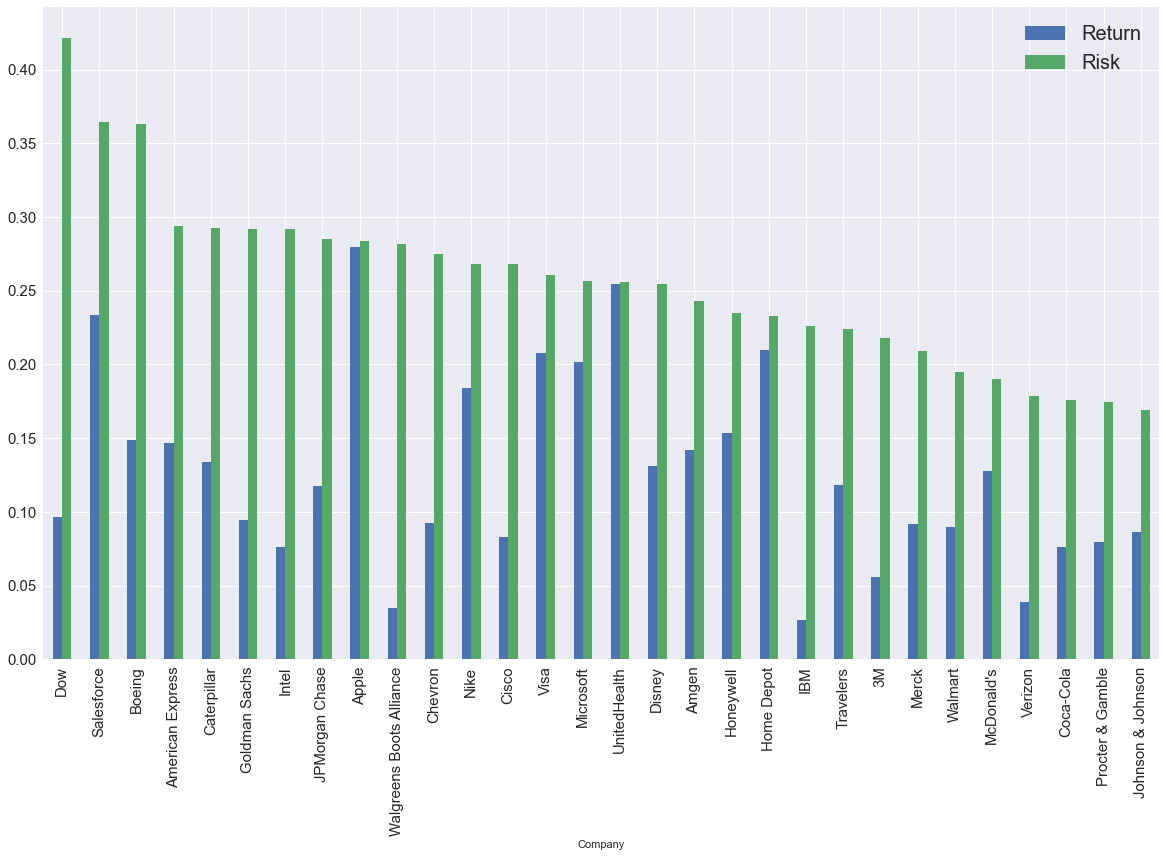

In [127]:
summary2.sort_values(by="Risk", ascending = False).plot(kind="bar", 
                    figsize=(20, 12), fontsize = 15)
plt.legend(fontsize=20)
plt.show()

In [128]:
summary2.set_index("Ticker", inplace=True)
summary2

,Return,Risk
Ticker,,
AAPL,0.279555,0.283920
AMGN,0.142182,0.242813
AXP,0.146731,0.294225
BA,0.148876,0.363069
CAT,0.133743,0.292401
CRM,0.233747,0.364669
CSCO,0.083082,0.267816
CVX,0.092832,0.275015
DIS,0.131349,0.254911


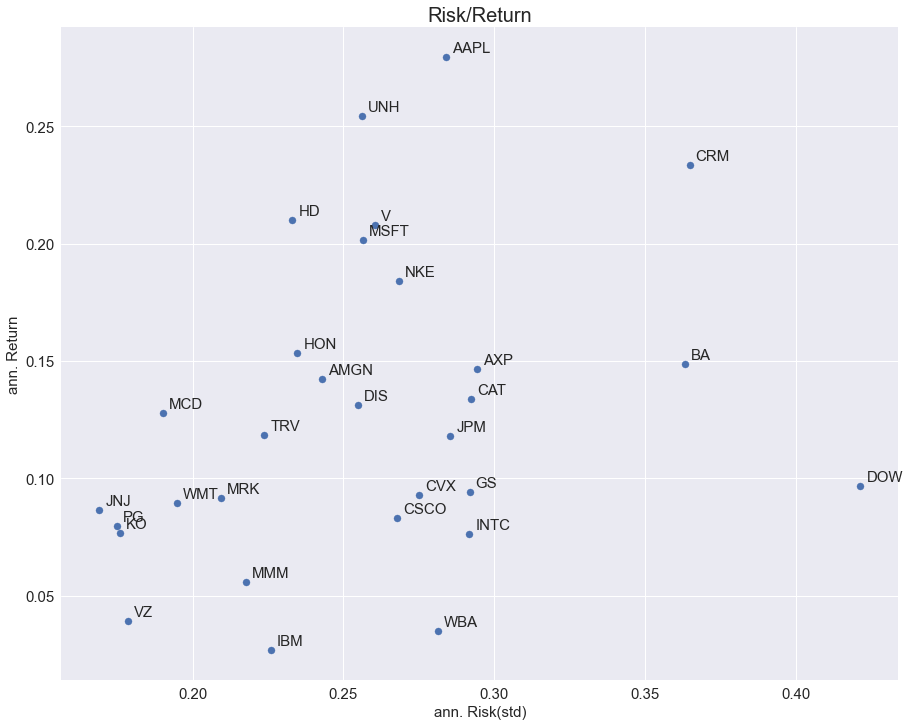

In [129]:
summary2.plot(kind="scatter", x="Risk", y="Return", figsize=(15,12), 
              s=50, fontsize=15)
for i in summary2.index:
    plt.annotate(i, xy=(summary2.loc[i, "Risk"]+0.002, summary2.loc[i, "Return"]
                       +0.002), size=15)
plt.xlabel("ann. Risk(std)", fontsize=15)
plt.ylabel("ann. Return", fontsize=15)
plt.title("Risk/Return", fontsize=20)
plt.show()

In [130]:
#correlation on the return rather than the stock prices
#correlation coefficient indcates how to stocks moving together -1 <corr< +1
#0 means no correlation at all
corr_matrix=ret.corr()
corr_matrix

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
AAPL,1.000000,0.364480,0.414903,0.399468,0.415485,0.447140,0.469691,0.353985,0.412483,0.407353,...,0.583397,0.420343,0.348689,0.336841,0.405503,0.482237,0.255939,0.299667,0.297267,0.623839
AMGN,0.364480,1.000000,0.371291,0.277546,0.365073,0.331779,0.382275,0.342507,0.368494,0.375558,...,0.426874,0.325188,0.423068,0.385112,0.452199,0.409635,0.360567,0.374354,0.328521,0.564000
AXP,0.414903,0.371291,1.000000,0.612121,0.564977,0.393986,0.465703,0.582399,0.601551,0.616394,...,0.476061,0.484949,0.358703,0.578737,0.471136,0.619936,0.345547,0.379323,0.252437,0.766001
BA,0.399468,0.277546,0.612121,1.000000,0.511182,0.350244,0.397721,0.523903,0.540229,0.527614,...,0.407744,0.440276,0.291900,0.486545,0.389497,0.482838,0.277473,0.349949,0.211371,0.708706
CAT,0.415485,0.365073,0.564977,0.511182,1.000000,0.378202,0.478023,0.600523,0.499698,0.726240,...,0.445653,0.428927,0.315573,0.492147,0.399010,0.467555,0.348259,0.382310,0.263612,0.728481
CRM,0.447140,0.331779,0.393986,0.350244,0.378202,1.000000,0.438556,0.308531,0.408679,0.338447,...,0.546893,0.432946,0.261672,0.313368,0.328096,0.481455,0.213603,0.259660,0.225947,0.552190
CSCO,0.469691,0.382275,0.465703,0.397721,0.478023,0.438556,1.000000,0.426041,0.477212,0.485263,...,0.553958,0.421635,0.413066,0.421579,0.402924,0.476298,0.332987,0.357338,0.335971,0.662348
CVX,0.353985,0.342507,0.582399,0.523903,0.600523,0.308531,0.426041,1.000000,0.480781,0.593326,...,0.414970,0.380616,0.327816,0.547973,0.450793,0.467515,0.370882,0.345189,0.239213,0.712625
DIS,0.412483,0.368494,0.601551,0.540229,0.499698,0.408679,0.477212,0.480781,1.000000,0.497141,...,0.477479,0.485619,0.371603,0.480860,0.402897,0.527735,0.353224,0.360096,0.297598,0.710046
DOW,0.407353,0.375558,0.616394,0.527614,0.726240,0.338447,0.485263,0.593326,0.497141,1.000000,...,0.400782,0.465322,0.335974,0.593062,0.393882,0.529085,0.409166,0.453042,0.282935,0.700318


In [131]:
#we use seaborn heatmap
import seaborn as sns

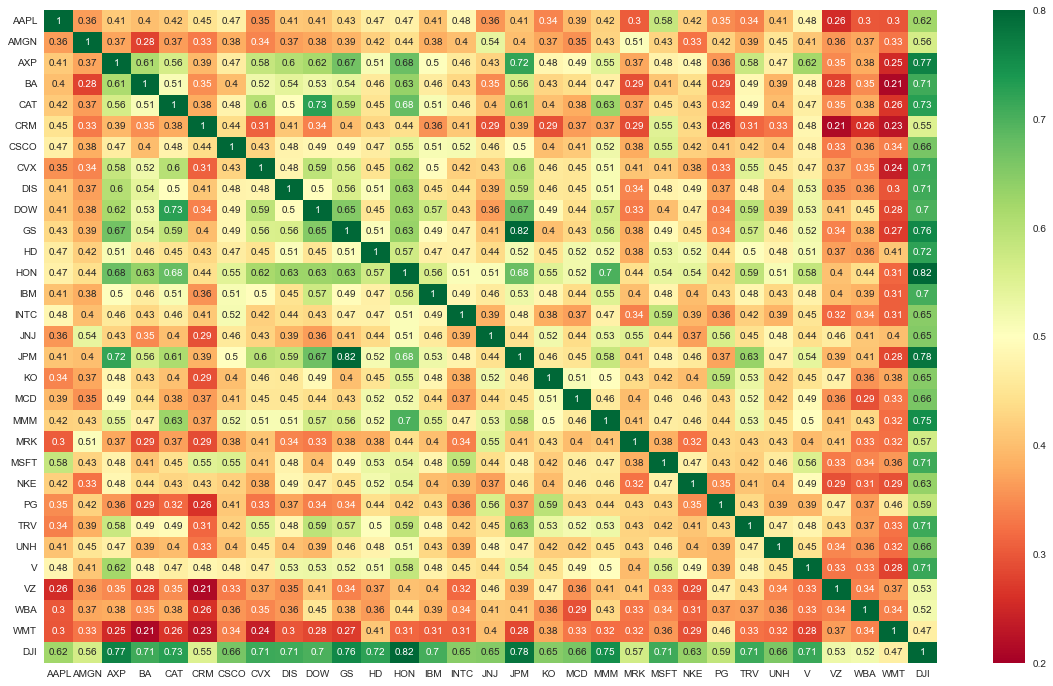

In [132]:
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, cmap='RdYlGn', annot=True, vmin=0.2, vmax=0.8)
plt.show()

In [133]:
#We annotate correlation
#vmin=0.2 means less than that is red
#vmax=0.8 means more than that is green
#all correlations are positive here andhigher than zero
#dow jones has high positive correlation with all indexes
#because all constituents arepart of dow jones index

## Index Tracking

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3188 entries, 2010-01-04 to 2022-08-31
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3188 non-null   float64
 1   AMGN    3188 non-null   float64
 2   AXP     3188 non-null   float64
 3   BA      3188 non-null   float64
 4   CAT     3188 non-null   float64
 5   CRM     3188 non-null   float64
 6   CSCO    3188 non-null   float64
 7   CVX     3188 non-null   float64
 8   DIS     3188 non-null   float64
 9   DOW     871 non-null    float64
 10  GS      3188 non-null   float64
 11  HD      3188 non-null   float64
 12  HON     3188 non-null   float64
 13  IBM     3188 non-null   float64
 14  INTC    3188 non-null   float64
 15  JNJ     3188 non-null   float64
 16  JPM     3188 non-null   float64
 17  KO      3188 non-null   float64
 18  MCD     3188 non-null   float64
 19  MMM     3188 non-null   float64
 20  MRK     3188 non-null   float64
 21  MSFT    3188 non-nu

In [135]:
df2=df.loc["2017":"2020"].copy()   #to select the time period
df2

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,29.037500,150.729996,75.349998,156.970001,93.989998,70.540001,30.540001,117.849998,106.080002,NaN,...,62.580002,51.980000,84.199997,120.900002,161.449997,79.500000,54.580002,82.959999,68.660004,19881.759766
2017-01-04,29.004999,152.869995,76.260002,158.619995,93.570000,72.800003,30.100000,117.820000,107.440002,NaN,...,62.299999,53.070000,84.500000,120.250000,161.910004,80.150002,54.520000,82.980003,69.059998,19942.160156
2017-01-05,29.152500,152.979996,75.320000,158.710007,93.000000,72.790001,30.170000,117.309998,107.379997,NaN,...,62.299999,53.060001,85.059998,118.330002,162.179993,81.089996,54.639999,83.029999,69.209999,19899.289062
2017-01-06,29.477501,156.779999,75.470001,159.100006,93.040001,73.800003,30.230000,116.839996,108.980003,NaN,...,62.840000,53.910000,85.029999,118.269997,162.410004,82.209999,53.259998,83.099998,68.260002,19963.800781
2017-01-09,29.747499,158.839996,75.860001,158.320007,92.370003,73.959999,30.180000,115.839996,108.360001,NaN,...,62.639999,53.380001,84.400002,117.320000,161.949997,81.750000,52.680000,82.550003,68.709999,19887.380859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,131.970001,222.929993,117.349998,217.149994,179.559998,225.779999,44.540001,85.330002,173.729996,54.790001,...,222.750000,141.600006,137.720001,138.490005,340.790009,208.699997,58.840000,39.619999,143.500000,30199.869141
2020-12-28,136.690002,223.649994,118.360001,216.089996,178.369995,224.639999,44.919998,84.900002,178.860001,54.290001,...,224.960007,142.429993,138.679993,139.190002,345.950012,212.630005,58.980000,39.660000,145.220001,30403.970703
2020-12-29,134.869995,226.869995,118.139999,216.250000,176.649994,222.460007,44.639999,84.610001,177.300003,54.330002,...,224.149994,141.570007,138.419998,138.350006,347.350006,214.369995,58.810001,39.410000,144.300003,30335.669922


In [136]:
norm2=df2.div(df2.iloc[0]).mul(100) #normalizing data for that time period
norm2

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,99.888072,101.419757,101.207702,101.051152,99.553146,103.203859,98.559265,99.974545,101.282052,NaN,...,99.552569,102.096961,100.356298,99.462364,100.284922,100.817612,99.890067,100.024113,100.582572,100.303798
2017-01-05,100.396039,101.492735,99.960187,101.108496,98.946699,103.189680,98.788471,99.541790,101.225486,NaN,...,99.552569,102.077726,101.021378,97.874277,100.452150,101.999995,100.109926,100.084378,100.801042,100.088168
2017-01-06,101.515284,104.013802,100.159260,101.356950,98.989257,104.621494,98.984933,99.142977,102.733787,NaN,...,100.415466,103.712967,100.985750,97.824644,100.594616,103.408804,97.581525,100.168755,99.417417,100.412645
2017-01-09,102.445111,105.380482,100.676844,100.860041,98.276418,104.848310,98.821216,98.294440,102.149320,NaN,...,100.095873,102.693347,100.237535,97.038874,100.309693,102.830189,96.518869,99.505791,100.072816,100.028273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,454.481272,147.900218,155.739882,138.338531,191.041602,320.073711,145.841518,72.405603,163.772618,NaN,...,355.944381,272.412480,163.562953,114.549217,211.080839,262.515719,107.805053,47.757955,209.000863,151.897365
2020-12-28,470.736119,148.377894,157.080296,137.663244,189.775507,318.457608,147.085779,72.040732,168.608595,NaN,...,359.475871,274.009223,164.703085,115.128206,214.276878,267.459126,108.061557,47.806172,211.505962,152.923942
2020-12-29,464.468337,150.514165,156.788324,137.765177,187.945524,315.367173,146.168952,71.794656,167.138009,NaN,...,358.181507,272.354768,164.394303,114.433420,215.144015,269.647793,107.750091,47.504822,210.166029,152.580407


In [137]:
ret2=ret.loc["2017":"2020"].copy()  #daily returns of the period
ret2

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.002849,0.030914,0.017144,0.008286,0.013479,0.030383,0.010589,0.001274,0.017847,NaN,...,0.007081,0.022624,0.001427,-0.012416,0.008810,0.018970,0.022480,0.002417,-0.006655,0.006030
2017-01-04,-0.001119,0.014198,0.012077,0.010512,-0.004469,0.032039,-0.014407,-0.000255,0.012821,NaN,...,-0.004474,0.020970,0.003563,-0.005376,0.002849,0.008176,-0.001099,0.000241,0.005826,0.003038
2017-01-05,0.005085,0.000720,-0.012326,0.000567,-0.006092,-0.000137,0.002326,-0.004329,-0.000558,NaN,...,0.000000,-0.000188,0.006627,-0.015967,0.001668,0.011728,0.002201,0.000602,0.002172,-0.002150
2017-01-06,0.011148,0.024840,0.001992,0.002457,0.000430,0.013876,0.001989,-0.004006,0.014900,NaN,...,0.008668,0.016020,-0.000353,-0.000507,0.001418,0.013812,-0.025256,0.000843,-0.013726,0.003242
2017-01-09,0.009159,0.013139,0.005168,-0.004903,-0.007201,0.002168,-0.001654,-0.008559,-0.005689,NaN,...,-0.003183,-0.009831,-0.007409,-0.008032,-0.002832,-0.005595,-0.010890,-0.006618,0.006592,-0.003828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.007712,-0.000045,0.003420,-0.011562,0.006389,-0.007255,0.003605,-0.004201,0.001037,0.000731,...,0.007827,-0.001129,0.010122,0.003915,0.009479,0.016561,-0.002035,-0.006270,0.001955,0.002325
2020-12-28,0.035766,0.003230,0.008607,-0.004881,-0.006627,-0.005049,0.008532,-0.005039,0.029529,-0.009126,...,0.009921,0.005861,0.006971,0.005054,0.015141,0.018831,0.002379,0.001010,0.011986,0.006758
2020-12-29,-0.013315,0.014398,-0.001859,0.000740,-0.009643,-0.009704,-0.006233,-0.003416,-0.008722,0.000737,...,-0.003601,-0.006038,-0.001875,-0.006035,0.004047,0.008183,-0.002882,-0.006304,-0.006335,-0.002246


In [138]:
#calculating individual stock tracking error
#we have to calculate the stock daily return and the daily return of the index
ret_diff=ret2.sub(ret2.DJI, axis=0)  #subtract the DJI return from the return of subsituent
ret_diff

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,-0.003180,0.024885,0.011114,0.002257,0.007449,0.024353,0.004559,-0.004755,0.011817,NaN,...,0.001051,0.016595,-0.004602,-0.018446,0.002781,0.012940,0.016451,-0.003613,-0.012685,0.0
2017-01-04,-0.004157,0.011160,0.009039,0.007474,-0.007507,0.029001,-0.017445,-0.003293,0.009783,NaN,...,-0.007512,0.017932,0.000525,-0.008414,-0.000189,0.005138,-0.004137,-0.002797,0.002788,0.0
2017-01-05,0.007235,0.002869,-0.010177,0.002717,-0.003942,0.002012,0.004475,-0.002179,0.001591,NaN,...,0.002150,0.001961,0.008777,-0.013817,0.003817,0.013878,0.004351,0.002752,0.004322,0.0
2017-01-06,0.007906,0.021598,-0.001250,-0.000785,-0.002812,0.010634,-0.001253,-0.007248,0.011659,NaN,...,0.005426,0.012778,-0.003595,-0.003749,-0.001824,0.010570,-0.028498,-0.002399,-0.016968,0.0
2017-01-09,0.012987,0.016967,0.008996,-0.001075,-0.003373,0.005996,0.002174,-0.004731,-0.001861,NaN,...,0.000645,-0.006003,-0.003581,-0.004205,0.000996,-0.001767,-0.007062,-0.002791,0.010420,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.005388,-0.002369,0.001096,-0.013886,0.004065,-0.009580,0.001281,-0.006526,-0.001287,-0.001594,...,0.005503,-0.003453,0.007797,0.001590,0.007154,0.014237,-0.004360,-0.008595,-0.000370,0.0
2020-12-28,0.029007,-0.003529,0.001848,-0.011640,-0.013386,-0.011808,0.001773,-0.011798,0.022770,-0.015884,...,0.003163,-0.000897,0.000212,-0.001704,0.008383,0.012073,-0.004379,-0.005749,0.005228,0.0
2020-12-29,-0.011068,0.016644,0.000388,0.002987,-0.007396,-0.007458,-0.003987,-0.001169,-0.006475,0.002983,...,-0.001354,-0.003792,0.000372,-0.003788,0.006293,0.010430,-0.000636,-0.004057,-0.004089,0.0


In [139]:
ret_diff.agg(["mean", "std"]).T  #mean and std return differences
#volatility of the std of return differences are the tracking error
#we try to minimize the tracking error
#we try to find 10 stocks with the lowest tracking errors

,mean,std
AAPL,0.001184,0.013815
AMGN,0.000059,0.013635
AXP,0.000209,0.013911
BA,0.000275,0.023257
CAT,0.000352,0.013722
CRM,0.000882,0.017401
CSCO,0.000026,0.012065
CVX,-0.000614,0.014697
DIS,0.000198,0.013569
DOW,0.000226,0.022876


## Selecting the Tracking stocks

In [140]:
def tracking_ann(returns):
    summary=returns.agg(["mean", "std"]).T
    summary["Premium"]=summary["mean"]*252
    summary["TE"]=summary["std"]*np.sqrt(252)
    summary.drop(columns=["mean", "std"], inplace=True)
    return summary
#calculating mean and std of return differences
#& annulizing them to user defined function & tracking annulized
#annulized return differences: premium
#annulized std: tracking error

In [141]:
tracking=tracking_ann(ret_diff)
tracking  #we sent data frame return differences to the "def" and 
#the result is called: "tracking"

,Premium,TE
AAPL,0.298342,0.219300
AMGN,0.014769,0.216441
AXP,0.052768,0.220823
BA,0.069355,0.369191
CAT,0.088779,0.217835
CRM,0.222173,0.276231
CSCO,0.006562,0.191518
CVX,-0.154676,0.233311
DIS,0.049806,0.215403
DOW,0.056879,0.363138


In [142]:
tracking.sort_values(by="TE") #sorted from low to high tracking error

,Premium,TE
DJI,0.000000,0.000000
V,0.161925,0.144392
HON,0.065026,0.144395
HD,0.075263,0.164357
KO,-0.040345,0.170755
JNJ,-0.032365,0.178310
MMM,-0.103473,0.178330
IBM,-0.165057,0.178381
MSFT,0.228009,0.178740
MCD,0.039296,0.181192


In [143]:
noa=10  #number of assets
tracking_stocks=tracking.sort_values(by="TE").index[:noa+1] #DJI is included
tracking_stocks

Index(['DJI', 'V', 'HON', 'HD', 'KO', 'JNJ', 'MMM', 'IBM', 'MSFT', 'MCD',
       'JPM'],
      dtype='object')

In [144]:
norm_track=norm2.loc[:, tracking_stocks]
norm_track

,DJI,V,HON,HD,KO,JNJ,MMM,IBM,MSFT,MCD,JPM
Date,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,100.303798,100.817612,100.275440,100.886012,99.641154,99.835985,100.151645,101.238106,99.552569,99.882963,99.633154
2017-01-05,100.088168,101.999995,100.499225,99.694733,99.880385,100.880529,99.809044,100.903160,99.552569,100.066874,98.716035
2017-01-06,100.412645,103.408804,102.022725,99.419255,99.856465,100.397105,100.101091,101.399604,100.415466,100.953017,98.727501
2017-01-09,100.028273,102.830189,101.179209,100.000000,98.851676,100.379836,99.561922,100.275138,100.095873,100.677142,98.796282
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,151.897365,262.515719,188.167970,201.712470,127.846889,131.621207,98.017412,74.579816,355.944381,176.717936,142.749045
2020-12-28,152.923942,267.459126,188.536173,200.469068,129.569380,132.242755,98.124125,74.657576,359.475871,178.916569,143.689088
2020-12-29,152.580407,269.647793,187.808756,198.190758,129.497613,133.062849,97.641114,74.047492,358.181507,177.821436,143.310785


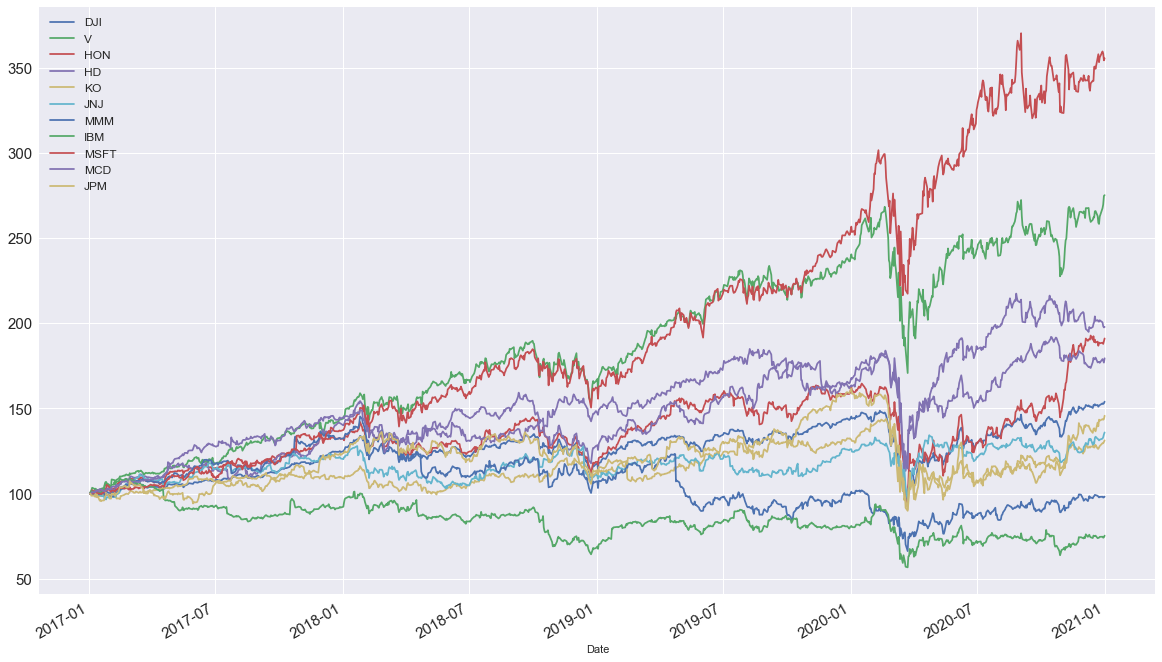

In [145]:
norm_track.plot(figsize=(20, 12), fontsize=15)
plt.legend(fontsize=12)
plt.show()

In [146]:
tracking_stocks=tracking_stocks[1:]
tracking_stocks

Index(['V', 'HON', 'HD', 'KO', 'JNJ', 'MMM', 'IBM', 'MSFT', 'MCD', 'JPM'], dtype='object')

## Index Tracking - A simple tracking portfolio

In [147]:
tracking_stocks

Index(['V', 'HON', 'HD', 'KO', 'JNJ', 'MMM', 'IBM', 'MSFT', 'MCD', 'JPM'], dtype='object')

In [148]:
#equal weights (starting point of optimization)
eweights=np.full(noa, 1/noa)
eweights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [149]:
#daily return for equally weighted return(mean method) portfolio
#daily return of tracking stocks
ret2.loc[:, tracking_stocks]

,V,HON,HD,KO,JNJ,MMM,IBM,MSFT,MCD,JPM
Date,,,,,,,,,,
2017-01-03,0.018970,0.002848,0.001715,0.008201,0.005468,-0.002912,0.007229,0.007081,-0.017253,0.010894
2017-01-04,0.008176,0.002754,0.008860,-0.003588,-0.001640,0.001516,0.012381,-0.004474,-0.001170,-0.003668
2017-01-05,0.011728,0.002232,-0.011808,0.002401,0.010463,-0.003421,-0.003309,0.000000,0.001841,-0.009205
2017-01-06,0.013812,0.015159,-0.002763,-0.000239,-0.004792,0.002926,0.004920,0.008668,0.008856,0.000116
2017-01-09,-0.005595,-0.008268,0.005841,-0.010062,-0.000172,-0.005386,-0.011089,-0.003183,-0.002733,0.000697
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.016561,-0.002191,0.004114,0.006782,0.003488,0.003046,0.006376,0.007827,-0.002971,-0.004398
2020-12-28,0.018831,0.001957,-0.006164,0.013473,0.004722,0.001089,0.001043,0.009921,0.012441,0.006585
2020-12-29,0.008183,-0.003858,-0.011365,-0.000554,0.006201,-0.004922,-0.008172,-0.003601,-0.006121,-0.002633


In [150]:
ret2.loc[:, tracking_stocks].mean(axis=1)

Date
2017-01-03    0.004224
2017-01-04    0.001915
2017-01-05    0.000092
2017-01-06    0.004666
2017-01-09   -0.003995
                ...   
2020-12-24    0.003864
2020-12-28    0.006390
2020-12-29   -0.002684
2020-12-30    0.003417
2020-12-31    0.007476
Length: 1007, dtype: float64

In [151]:
ret2.loc[:, tracking_stocks].dot(eweights)
#dot method is used for prtfoliosthat are not equally weighted

Date
2017-01-03    0.004224
2017-01-04    0.001915
2017-01-05    0.000092
2017-01-06    0.004666
2017-01-09   -0.003995
                ...   
2020-12-24    0.003864
2020-12-28    0.006390
2020-12-29   -0.002684
2020-12-30    0.003417
2020-12-31    0.007476
Length: 1007, dtype: float64

In [152]:
#calculate portfolio returns(based on weights)
def port_ret(weights):
    return ret2.loc[:, tracking_stocks].dot(weights)

In [153]:
def tracking_error(weights):
    return port_ret(weights).sub(ret2.DJI).std()*np.sqrt(252)

In [154]:
tracking_error(eweights)

0.04809999950304166

In [155]:
#we have the daily returns of our portfolio 
#we can calculate normalized prices
ew_port = port_ret(eweights)[1:].add(1).cumprod().mul(100)
ew_port

Date
2017-01-04    100.191464
2017-01-05    100.200702
2017-01-06    100.668257
2017-01-09    100.266080
2017-01-10    100.137524
                 ...    
2020-12-24    168.887507
2020-12-28    169.966670
2020-12-29    169.510462
2020-12-30    170.089700
2020-12-31    171.361334
Length: 1006, dtype: float64

In [156]:
norm_track["EW_Port"]=ew_port
norm_track.iloc[0, -1]=100
norm_track

,DJI,V,HON,HD,KO,JNJ,MMM,IBM,MSFT,MCD,JPM,EW_Port
Date,,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,100.303798,100.817612,100.275440,100.886012,99.641154,99.835985,100.151645,101.238106,99.552569,99.882963,99.633154,100.191464
2017-01-05,100.088168,101.999995,100.499225,99.694733,99.880385,100.880529,99.809044,100.903160,99.552569,100.066874,98.716035,100.200702
2017-01-06,100.412645,103.408804,102.022725,99.419255,99.856465,100.397105,100.101091,101.399604,100.415466,100.953017,98.727501,100.668257
2017-01-09,100.028273,102.830189,101.179209,100.000000,98.851676,100.379836,99.561922,100.275138,100.095873,100.677142,98.796282,100.266080
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,151.897365,262.515719,188.167970,201.712470,127.846889,131.621207,98.017412,74.579816,355.944381,176.717936,142.749045,168.887507
2020-12-28,152.923942,267.459126,188.536173,200.469068,129.569380,132.242755,98.124125,74.657576,359.475871,178.916569,143.689088,169.966670
2020-12-29,152.580407,269.647793,187.808756,198.190758,129.497613,133.062849,97.641114,74.047492,358.181507,177.821436,143.310785,169.510462


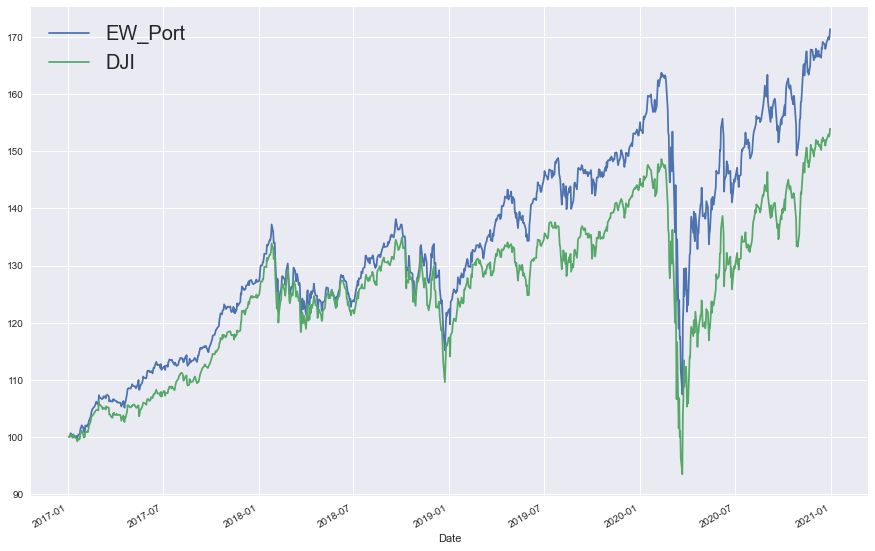

In [157]:
norm_track[["EW_Port", "DJI"]].plot(figsize=(15, 10))
plt.legend(fontsize=20, loc=2)
plt.show()
#we can minimize errors by optimizing the weights

## Index Tracking - The optimal Tracking Portfolio

In [158]:
#for optimal tracking portfolio that minimize tracking error
#we need optimal weights for 10 stocks(it is a complex optimization)
#we use quadratic optimization algorithm from scipy library
import scipy.optimize as sco 

In [159]:
#constraint: weights must sum up to 1 -> sum of weights -1 = 0
cons=({"type": "eq", "fun": lambda x:np.sum(x)-1})
cons

{'type': 'eq', 'fun': <function __main__.<lambda>(x)>}

In [160]:
#bounds: all weights shall be between 0 and 1 -> can be changed
bnds = tuple((0,1) for x in range(noa))
bnds

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [161]:
#run optimization based on function to be minimized, starting with equal weights and based on respective bounds and constraints
opts = sco.minimize(tracking_error, eweights, method = "SLSQP", bounds = bnds, constraints= cons)

In [162]:
#output of optimization
opts

     fun: 0.045014230173472836
     jac: array([0.00877236, 0.00813005, 0.00883456, 0.00904427, 0.00859143,
       0.00885961, 0.00833156, 0.0086653 , 0.00833092, 0.0088626 ])
 message: 'Optimization terminated successfully'
    nfev: 56
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.0942561 , 0.09991966, 0.13238293, 0.04917084, 0.10660418,
       0.08524192, 0.07818146, 0.12848557, 0.07587784, 0.14987948])

In [163]:
#getting the optimal weights
optimal_weights = opts["x"]
optimal_weights

array([0.0942561 , 0.09991966, 0.13238293, 0.04917084, 0.10660418,
       0.08524192, 0.07818146, 0.12848557, 0.07587784, 0.14987948])

In [164]:
pd.Series(index = tracking_stocks, data = optimal_weights)

V       0.094256
HON     0.099920
HD      0.132383
KO      0.049171
JNJ     0.106604
MMM     0.085242
IBM     0.078181
MSFT    0.128486
MCD     0.075878
JPM     0.149879
dtype: float64

In [165]:
opt_port = port_ret(optimal_weights)[1:].add(1).cumprod().mul(100)
opt_port

Date
2017-01-04    100.175122
2017-01-05    100.095828
2017-01-06    100.532770
2017-01-09    100.238076
2017-01-10    100.240488
                 ...    
2020-12-24    178.302752
2020-12-28    179.319152
2020-12-29    178.805400
2020-12-30    179.310713
2020-12-31    180.618944
Length: 1006, dtype: float64

In [166]:
norm_track["Opt_Port"] = opt_port
norm_track.iloc[0, -1] = 100

In [167]:
norm_track

,DJI,V,HON,HD,KO,JNJ,MMM,IBM,MSFT,MCD,JPM,EW_Port,Opt_Port
Date,,,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,100.303798,100.817612,100.275440,100.886012,99.641154,99.835985,100.151645,101.238106,99.552569,99.882963,99.633154,100.191464,100.175122
2017-01-05,100.088168,101.999995,100.499225,99.694733,99.880385,100.880529,99.809044,100.903160,99.552569,100.066874,98.716035,100.200702,100.095828
2017-01-06,100.412645,103.408804,102.022725,99.419255,99.856465,100.397105,100.101091,101.399604,100.415466,100.953017,98.727501,100.668257,100.532770
2017-01-09,100.028273,102.830189,101.179209,100.000000,98.851676,100.379836,99.561922,100.275138,100.095873,100.677142,98.796282,100.266080,100.238076
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,151.897365,262.515719,188.167970,201.712470,127.846889,131.621207,98.017412,74.579816,355.944381,176.717936,142.749045,168.887507,178.302752
2020-12-28,152.923942,267.459126,188.536173,200.469068,129.569380,132.242755,98.124125,74.657576,359.475871,178.916569,143.689088,169.966670,179.319152
2020-12-29,152.580407,269.647793,187.808756,198.190758,129.497613,133.062849,97.641114,74.047492,358.181507,177.821436,143.310785,169.510462,178.805400


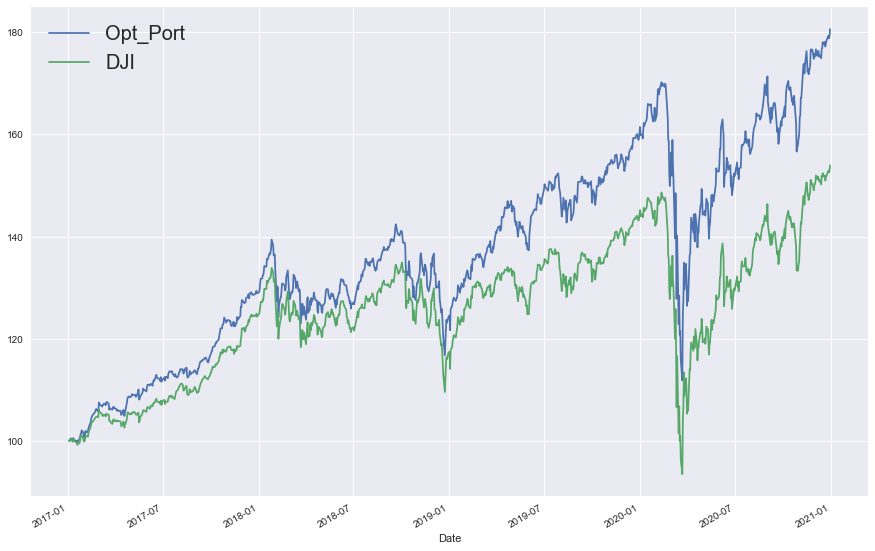

In [168]:
norm_track[["Opt_Port", "DJI"]].plot(figsize = (15, 10))
plt.legend(fontsize = 20, loc = 2)
plt.show()

In [169]:
summary_ann(norm_track[["Opt_Port", "EW_Port", "DJI"]].pct_change())

,Return,Risk
Opt_Port,0.171023,0.213534
EW_Port,0.156427,0.206870
DJI,0.131677,0.216442


# forward testing(part 1)

In [170]:
df

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.643214,57.720001,40.919998,56.180000,58.549999,18.705000,24.690001,79.059998,32.070000,NaN,...,30.950001,16.337500,61.119999,49.810001,31.530001,22.035000,31.212946,37.299999,54.230000,10583.959961
2010-01-05,7.656429,57.220001,40.830002,58.020000,59.250000,18.625000,24.580000,79.620003,31.990000,NaN,...,30.959999,16.402500,61.139999,48.630001,31.480000,21.782499,31.269218,37.000000,53.689999,10572.019531
2010-01-06,7.534643,56.790001,41.490002,59.779999,59.430000,18.592501,24.420000,79.629997,31.820000,NaN,...,30.770000,16.302500,60.849998,47.939999,31.790001,21.490000,29.937416,36.720001,53.570000,10573.679688
2010-01-07,7.520714,56.270000,41.980000,62.200001,59.669998,18.510000,24.530001,79.330002,31.830000,NaN,...,30.450001,16.462500,60.520000,48.630001,33.009998,21.690001,29.759218,36.939999,53.599998,10606.860352
2010-01-08,7.570714,56.770000,41.950001,61.599998,60.340000,18.537500,24.660000,79.470001,31.879999,NaN,...,30.660000,16.430000,60.439999,48.560001,32.700001,21.750000,29.777975,36.990002,53.330002,10618.190430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,170.029999,245.679993,162.229996,169.380005,198.880005,173.910004,47.270000,164.619995,117.459999,55.759998,...,278.850006,113.220001,145.699997,168.979996,541.570007,209.820007,43.740002,36.799999,135.869995,33291.781250
2022-08-26,163.619995,240.649994,157.309998,164.529999,191.919998,165.229996,45.889999,163.410004,114.070000,54.459999,...,268.089996,108.279999,142.289993,166.839996,529.250000,202.889999,43.250000,36.000000,131.600006,32283.400391
2022-08-29,161.380005,239.380005,154.539993,165.419998,191.779999,160.210007,45.709999,164.630005,113.529999,53.570000,...,265.230011,107.879997,141.690002,165.360001,529.770020,202.330002,43.330002,35.959999,132.880005,32098.990234


In [171]:
ret

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.008663,-0.002199,0.032752,0.011956,-0.004277,-0.004455,0.007083,-0.002495,NaN,...,0.000323,0.003979,0.000327,-0.023690,-0.001586,-0.011459,0.001803,-0.008043,-0.009958,-0.001128
2010-01-06,-0.015906,-0.007515,0.016165,0.030334,0.003038,-0.001745,-0.006509,0.000126,-0.005314,NaN,...,-0.006137,-0.006097,-0.004743,-0.014189,0.009848,-0.013428,-0.042591,-0.007568,-0.002235,0.000157
2010-01-07,-0.001849,-0.009157,0.011810,0.040482,0.004038,-0.004437,0.004505,-0.003767,0.000314,NaN,...,-0.010400,0.009814,-0.005423,0.014393,0.038377,0.009307,-0.005952,0.005991,0.000560,0.003138
2010-01-08,0.006648,0.008886,-0.000715,-0.009646,0.011228,0.001486,0.005300,0.001765,0.001571,NaN,...,0.006897,-0.001974,-0.001322,-0.001439,-0.009391,0.002766,0.000630,0.001354,-0.005037,0.001068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,0.014923,0.004867,0.019481,0.035330,0.024310,-0.033887,0.004249,0.008763,0.009020,0.028024,...,0.011095,0.016246,-0.000823,0.002908,0.009525,0.015242,0.004363,0.000816,0.006668,0.009783
2022-08-26,-0.037699,-0.020474,-0.030327,-0.028634,-0.034996,-0.049911,-0.029194,-0.007350,-0.028861,-0.023314,...,-0.038587,-0.043632,-0.023404,-0.012664,-0.022749,-0.033028,-0.011203,-0.021739,-0.031427,-0.030289
2022-08-29,-0.013690,-0.005277,-0.017609,0.005409,-0.000729,-0.030382,-0.003922,0.007466,-0.004734,-0.016342,...,-0.010668,-0.003694,-0.004217,-0.008871,0.000983,-0.002760,0.001850,-0.001111,0.009726,-0.005712


In [172]:
tracking_stocks

Index(['V', 'HON', 'HD', 'KO', 'JNJ', 'MMM', 'IBM', 'MSFT', 'MCD', 'JPM'], dtype='object')

In [173]:
def tracking_error_gen(data, tracking_stocks, weights, index, start, end):
    return data.loc[start:end, tracking_stocks].dot(weights).sub(ret.loc[start:end, index]).std() * np.sqrt(252)   

In [174]:
def visual(data, tracking_stocks, weights, index, start, end):
    track = data.loc[start:end, tracking_stocks].dot(weights).add(1).cumprod().mul(100)
    track.name = "Portfolio"
    index = data.loc[start:end, index].add(1).cumprod().mul(100)
    plt.figure(figsize = (12,8))
    track.plot()
    index.plot()
    plt.legend(fontsize = 20, loc = 2)
    plt.show()

In [175]:
tracking_error_gen(ret, tracking_stocks, optimal_weights, "DJI", "2017-01-01", "2020-12-31")

0.045014230173472836

In [176]:
forward_te = tracking_error_gen(ret, tracking_stocks, optimal_weights, "DJI", 
                                "2019-01-01", "2019-12-31")
forward_te

0.04164775988743301

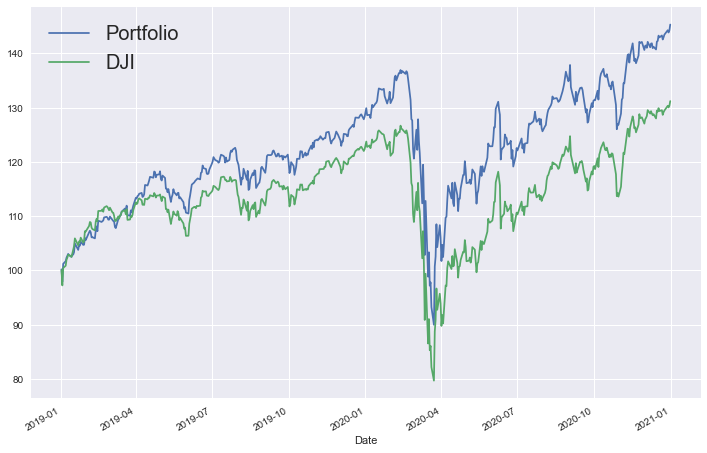

In [177]:
visual(ret, tracking_stocks, optimal_weights, "DJI", "2019-01-01", "2020-12-31")

## Forward Testing (Part 2)

In [178]:
bucket = df.columns.drop(["DOW", "DJI"])
bucket

Index(['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'GS',
       'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK',
       'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT'],
      dtype='object')

In [179]:
np.random.choice(bucket, size = noa, replace = False)

array(['CAT', 'V', 'MCD', 'VZ', 'TRV', 'BA', 'HON', 'MSFT', 'HD', 'MMM'],
      dtype=object)

In [180]:
random_numbers = np.random.random(noa)
random_weights = random_numbers / random_numbers.sum()
random_weights.sum()

0.9999999999999999

In [181]:
np.random.seed(123)
random_stocks = np.random.choice(bucket, size = noa, replace = False)
random_numbers = np.random.random(noa)
random_weights = random_numbers / random_numbers.sum()

In [182]:
print(random_stocks, random_weights)

['CVX' 'WMT' 'CRM' 'V' 'DIS' 'VZ' 'IBM' 'NKE' 'HON' 'PG'] [0.0858475  0.05974735 0.098733   0.14853474 0.07177554 0.08370995
 0.13136476 0.07500036 0.04705319 0.19823361]


In [183]:
tracking_error_gen(ret, random_stocks, random_weights, "DJI", "2021-01-01", "2022-08-31")

0.06159527377296968

In [184]:
forward_te

0.04164775988743301

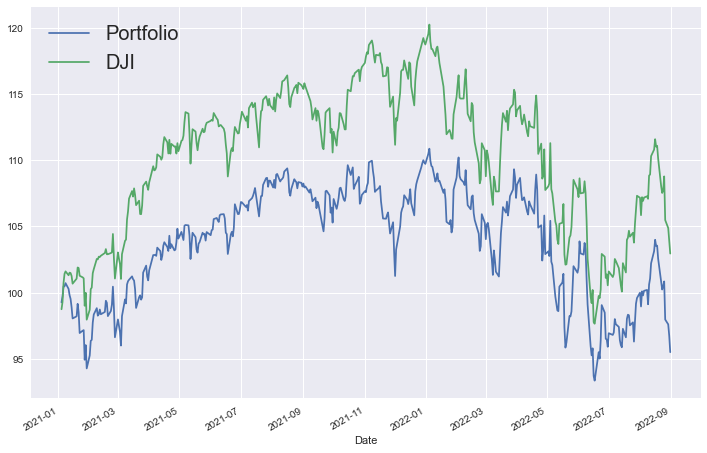

In [185]:
visual(ret, random_stocks, random_weights, "DJI", "2021-01-01", "2022-08-31")

In [186]:
tes = np.empty(10000)
np.random.seed(123)
for i in range(10000):
    random_numbers = np.random.random(noa)
    random_weights = random_numbers / random_numbers.sum()
    random_stocks = np.random.choice(bucket, size = noa, replace = False)
       
    tes[i] = tracking_error_gen(ret, random_stocks, random_weights, "DJI", "2021-01-01", "2022-08-31")

In [187]:
(tes < forward_te).mean()

0.0

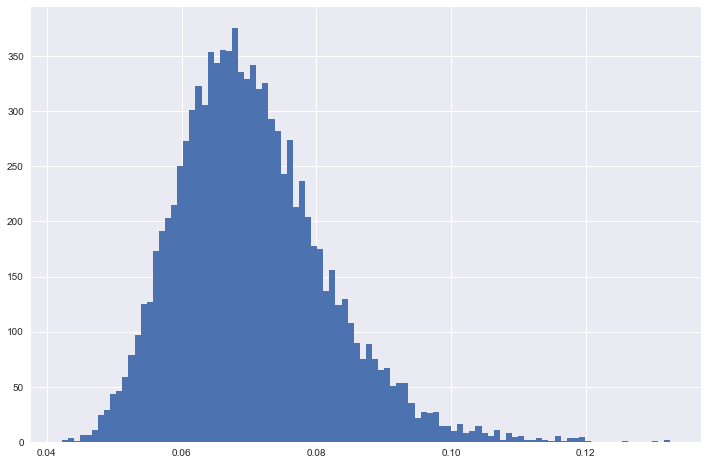

In [188]:
plt.figure(figsize = (12, 8))
plt.hist(tes, bins = 100)
plt.show()